EDA 

In [145]:
import warnings
warnings.filterwarnings("ignore")

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", None)

In [147]:
app_data = pd.read_csv("application_train.csv")
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,WEDNESDAY,10,0,0,-1134.0,0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,MONDAY,11,0,0,-828.0,0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,MONDAY,9,0,0,-815.0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,WEDNESDAY,17,0,0,-617.0,0,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,THURSDAY,11,0,0,-1106.0,0,0


In [148]:
#Data inspection on Application dataset
#Get info and shape on the dataset
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199545 entries, 0 to 199544
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   199545 non-null  int64  
 1   TARGET                       199545 non-null  int64  
 2   NAME_CONTRACT_TYPE           199545 non-null  object 
 3   CODE_GENDER                  199545 non-null  object 
 4   FLAG_OWN_CAR                 199545 non-null  object 
 5   FLAG_OWN_REALTY              199545 non-null  object 
 6   CNT_CHILDREN                 199545 non-null  int64  
 7   AMT_INCOME_TOTAL             199545 non-null  float64
 8   AMT_CREDIT                   199545 non-null  float64
 9   AMT_ANNUITY                  199537 non-null  float64
 10  AMT_GOODS_PRICE              199383 non-null  float64
 11  NAME_TYPE_SUITE              198733 non-null  object 
 12  NAME_INCOME_TYPE             199545 non-null  object 
 13 

In [149]:
#data quailty check 
#check for percentage null values in application dataset
pd.set_option('display.max_rows' ,200 )
app_data.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.004009
AMT_GOODS_PRICE                 0.081185
NAME_TYPE_SUITE                 0.406926
NAME_INCOME_TYPE                0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    66.019194
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [150]:
#Droping columns missing values greater than 30%
percentage = 30
threshold = int(((100 - percentage) / 100) * app_data.shape[0] + 1)
app_df = app_data.dropna(axis= 1, thresh=threshold)
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,1,1,0,1,1,0,1.0,2,WEDNESDAY,10,0,0,-1134.0,0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,0,1,1,0,2.0,1,MONDAY,11,0,0,-828.0,0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,1,1,1,1,1,0,1.0,2,MONDAY,9,0,0,-815.0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,1,1,0,1,0,0,2.0,2,WEDNESDAY,17,0,0,-617.0,0,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,1,1,0,1,0,0,1.0,2,THURSDAY,11,0,0,-1106.0,0,0


In [151]:
app_df.shape

(199545, 35)

In [152]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.004009
AMT_GOODS_PRICE                0.081185
NAME_TYPE_SUITE                0.406926
NAME_INCOME_TYPE               0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000


In [153]:
#imputing missing data
#check missing values in application dataset before imputing
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199545 entries, 0 to 199544
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   199545 non-null  int64  
 1   TARGET                       199545 non-null  int64  
 2   NAME_CONTRACT_TYPE           199545 non-null  object 
 3   CODE_GENDER                  199545 non-null  object 
 4   FLAG_OWN_CAR                 199545 non-null  object 
 5   FLAG_OWN_REALTY              199545 non-null  object 
 6   CNT_CHILDREN                 199545 non-null  int64  
 7   AMT_INCOME_TOTAL             199545 non-null  float64
 8   AMT_CREDIT                   199545 non-null  float64
 9   AMT_ANNUITY                  199537 non-null  float64
 10  AMT_GOODS_PRICE              199383 non-null  float64
 11  NAME_TYPE_SUITE              198733 non-null  object 
 12  NAME_INCOME_TYPE             199545 non-null  object 
 13 

In [154]:
#Ocuupation_type column has 30% missing values ,since its a categoricl column ,imputing missing values with unknown and other value 
app_data.OCCUPATION_TYPE.isnull().mean()*100

31.424490716379765

In [155]:
app_data.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Laborers                 26.216210
Sales staff              15.089996
Core staff               13.092759
Managers                 10.082652
Drivers                   8.835931
High skill tech staff     5.363968
Accountants               4.698222
Medicine staff            4.062438
Security staff            3.213996
Cooking staff             2.831795
Cleaning staff            2.179203
Private service staff     1.253298
Low-skill Laborers        0.993138
Waiters/barmen staff      0.622630
Secretaries               0.612399
Realty agents             0.344931
HR staff                  0.266006
IT staff                  0.240429
Name: proportion, dtype: float64

In [156]:
app_data.OCCUPATION_TYPE.fillna("Others" , inplace = True)

In [157]:
app_data.OCCUPATION_TYPE.isnull().mean()*100

0.0

In [158]:
app_data.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Others                   31.424491
Laborers                 17.977900
Sales staff              10.348042
Core staff                8.978426
Managers                  6.914230
Drivers                   6.059285
High skill tech staff     3.678368
Accountants               3.221830
Medicine staff            2.785838
Security staff            2.204014
Cooking staff             1.941918
Cleaning staff            1.494400
Private service staff     0.859455
Low-skill Laborers        0.681049
Waiters/barmen staff      0.426971
Secretaries               0.419955
Realty agents             0.236538
HR staff                  0.182415
IT staff                  0.164875
Name: proportion, dtype: float64

In [159]:
#conclusion: since it numerical columns and there is not much difference between Mean and Median .Hence we can impute with mean and median
null_cols = list(app_df.isna().any())
len(null_cols)

35

In [160]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.004009
AMT_GOODS_PRICE                0.081185
NAME_TYPE_SUITE                0.406926
NAME_INCOME_TYPE               0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000


In [161]:
app_data.DAYS_BIRTH = app_data.DAYS_BIRTH.apply(lambda x: abs(x))
app_data.DAYS_EMPLOYED = app_data.DAYS_EMPLOYED.apply(lambda x: abs(x))

In [162]:
#we have no null colums
#binning of continue variables
#standardizing days coloums in years for easy binning
app_data["YEARS_BIRTH"] = app_data.DAYS_BIRTH.apply(lambda x: int(x//356))
app_data["YEARS_EMPLOYED"] = app_data.DAYS_EMPLOYED.apply(lambda x: int(x//356))

In [163]:
# binning AMT_INCOME_TOTAL column
app_data.AMT_INCOME_TOTAL.value_counts(normalize= True)*100


AMT_INCOME_TOTAL
135000.0    11.656017
112500.0    10.089454
157500.0     8.632138
180000.0     8.040793
90000.0      7.297602
              ...    
40306.5      0.000501
469800.0     0.000501
63661.5      0.000501
115290.0     0.000501
90166.5      0.000501
Name: proportion, Length: 1905, dtype: float64

In [164]:
app_data.AMT_INCOME_TOTAL.describe()

count    1.995450e+05
mean     1.688705e+05
std      2.808584e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

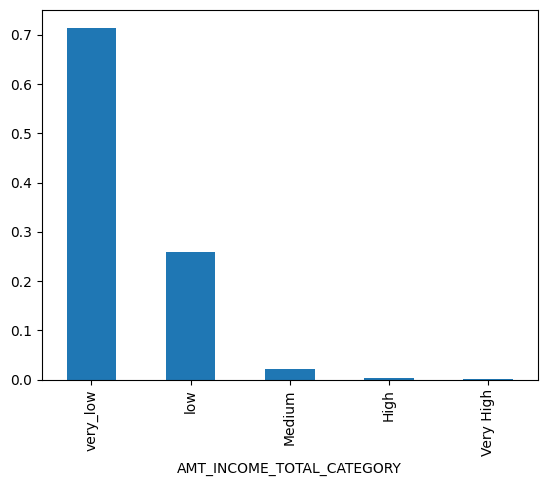

In [165]:
app_data["AMT_INCOME_TOTAL_CATEGORY"] = pd.cut(app_data.AMT_INCOME_TOTAL, [0, 200000,400000,600000,800000,10000000], labels= ["very_low", "low","Medium", "High", "Very High"], include_lowest=True)
app_data["AMT_INCOME_TOTAL_CATEGORY"].value_counts(normalize=True).plot.bar()

plt.show()

Conclusion: The credit amount for the loan are from low to very high

In [166]:
app_data["AGE_Category"] = pd.cut(app_data.YEARS_BIRTH, [0,25,45,65,85], labels=["Below 25", "25-45", "45-65", "65-85"] )

In [167]:
app_data.AGE_Category.value_counts(normalize=True)*100

AGE_Category
25-45       50.057882
45-65       41.770027
Below 25     4.441104
65-85        3.730988
Name: proportion, dtype: float64

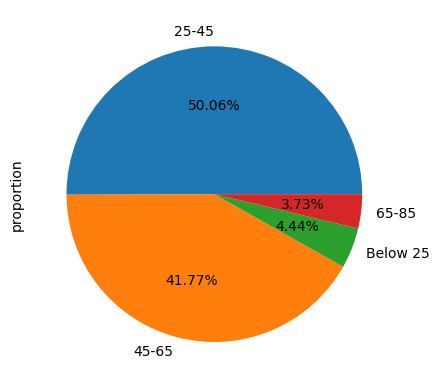

In [168]:
app_data.AGE_Category.value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.show()

DIVIDING APPLICATION DATA WITH TARGET 0 AND 1 

In [169]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,YEARS_BIRTH,YEARS_EMPLOYED,AMT_INCOME_TOTAL_CATEGORY,AGE_Category
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Single / not married,House / apartment,0.018801,9461,637,-3648,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,WEDNESDAY,10,0,0,-1134.0,0,1,26,1,low,25-45
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Married,House / apartment,0.003541,16765,1188,-1186,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,MONDAY,11,0,0,-828.0,0,1,47,3,low,45-65
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Single / not married,House / apartment,0.010032,19046,225,-4260,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,MONDAY,9,0,0,-815.0,0,0,53,0,very_low,45-65
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Civil marriage,House / apartment,0.008019,19005,3039,-9833,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,WEDNESDAY,17,0,0,-617.0,0,1,53,8,very_low,45-65
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Single / not married,House / apartment,0.028663,19932,3038,-4311,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,THURSDAY,11,0,0,-1106.0,0,0,55,8,very_low,45-65


In [171]:
tar_0 = app_data[app_data.CODE_GENDER == 'M']
tar_1 = app_data[app_data.CODE_GENDER == 'F']

In [172]:
app_data.CODE_GENDER.value_counts(normalize=True)

CODE_GENDER
F      0.657546
M      0.342434
XNA    0.000020
Name: proportion, dtype: float64

Conclusion 2 out of 3 are female

Univariate Analysis

In [173]:
cat_cols = list(app_data.columns[app_data.dtypes == np.object_])
num_cols = list(app_data.columns[app_data.dtypes == np.int64]) + list(app_data.columns[app_data.dtypes == np.float64])

In [174]:
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START']

In [175]:
num_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE']

NAME_CONTRACT_TYPE
Cash loans         0.905365
Revolving loans    0.094635
Name: proportion, dtype: float64


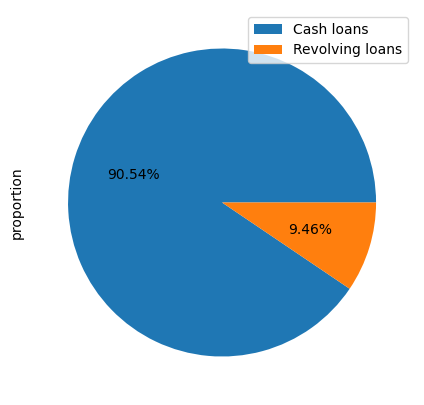

CODE_GENDER
F      0.657546
M      0.342434
XNA    0.000020
Name: proportion, dtype: float64


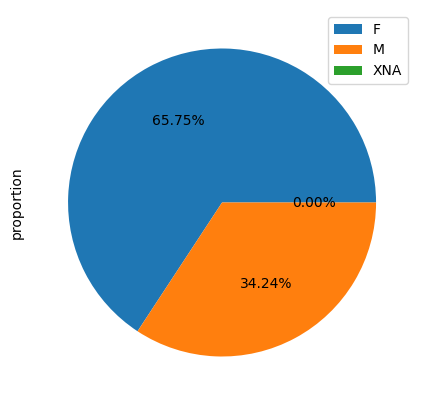

FLAG_OWN_CAR
N    0.660182
Y    0.339818
Name: proportion, dtype: float64


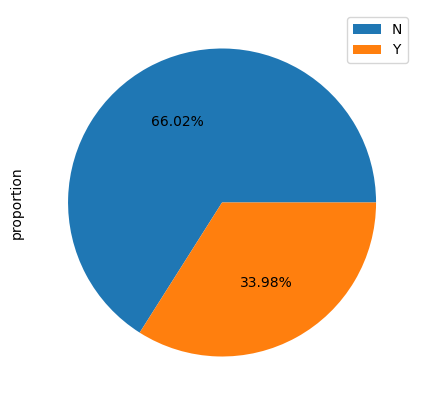

FLAG_OWN_REALTY
Y    0.693007
N    0.306993
Name: proportion, dtype: float64


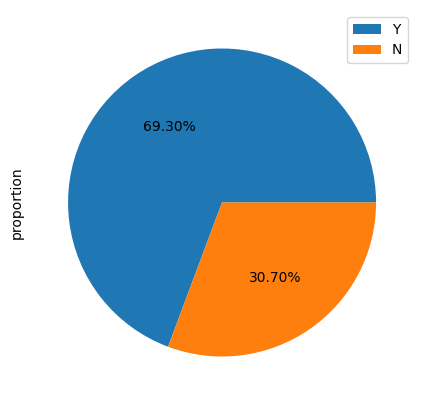

NAME_TYPE_SUITE
Unaccompanied      0.811647
Family             0.131101
Spouse, partner    0.037306
Children           0.010708
Other_B            0.005535
Other_A            0.002803
Group of people    0.000901
Name: proportion, dtype: float64


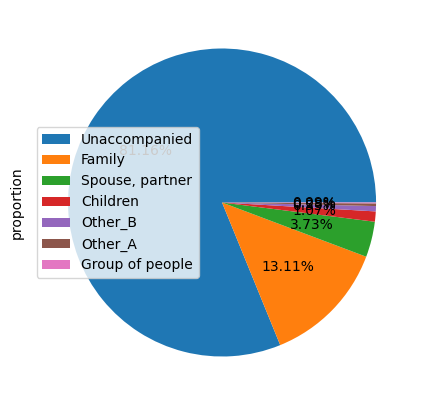

NAME_INCOME_TYPE
Working                 0.516535
Commercial associate    0.233226
Pensioner               0.179989
State servant           0.070074
Unemployed              0.000070
Student                 0.000065
Businessman             0.000030
Maternity leave         0.000010
Name: proportion, dtype: float64


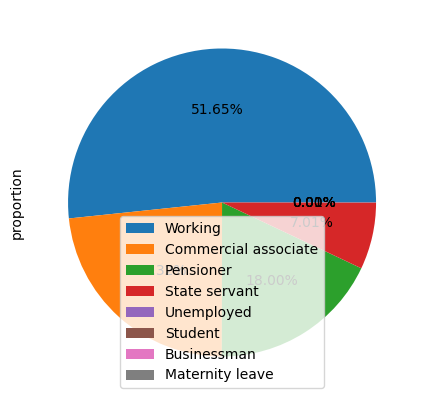

NAME_FAMILY_STATUS
Married                 0.640021
Single / not married    0.147145
Civil marriage          0.096449
Separated               0.064111
Widow                   0.052264
Unknown                 0.000010
Name: proportion, dtype: float64


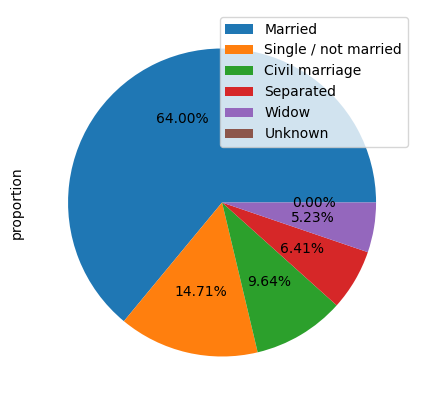

NAME_HOUSING_TYPE
House / apartment      0.887950
With parents           0.047909
Municipal apartment    0.036257
Rented apartment       0.015651
Office apartment       0.008564
Co-op apartment        0.003668
Name: proportion, dtype: float64


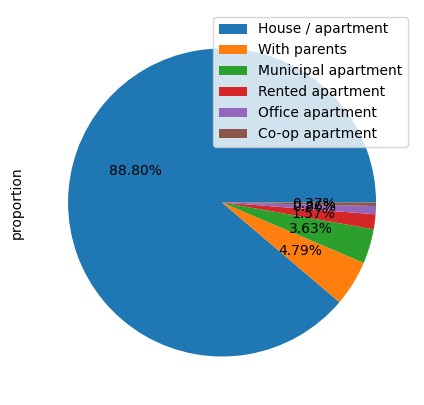

OCCUPATION_TYPE
Others                   0.314245
Laborers                 0.179779
Sales staff              0.103480
Core staff               0.089784
Managers                 0.069142
Drivers                  0.060593
High skill tech staff    0.036784
Accountants              0.032218
Medicine staff           0.027858
Security staff           0.022040
Cooking staff            0.019419
Cleaning staff           0.014944
Private service staff    0.008595
Low-skill Laborers       0.006810
Waiters/barmen staff     0.004270
Secretaries              0.004200
Realty agents            0.002365
HR staff                 0.001824
IT staff                 0.001649
Name: proportion, dtype: float64


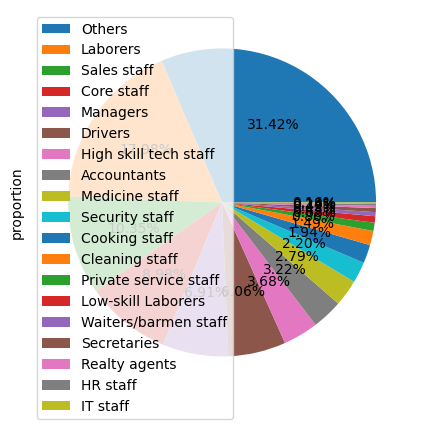

WEEKDAY_APPR_PROCESS_START
TUESDAY      0.175284
WEDNESDAY    0.168443
MONDAY       0.165246
THURSDAY     0.164529
FRIDAY       0.163938
SATURDAY     0.110381
SUNDAY       0.052179
Name: proportion, dtype: float64


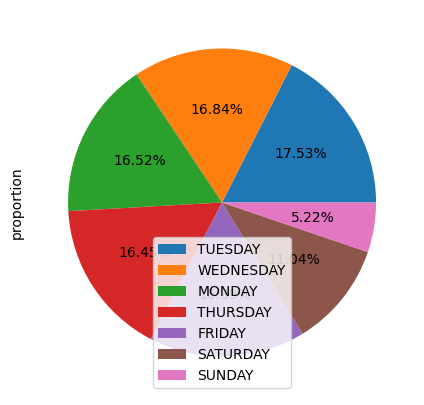

In [176]:
for col in cat_cols:
    print(app_data[col].value_counts(normalize = True))
    plt.figure(figsize=[5,5])     
    app_data[col].value_counts(normalize=True).plot.pie(labeldistance=None, autopct='%1.2f%%')
    plt.legend()
    plt.show() 

Conclusions to be given 

In [177]:
num_cols_withflag=[]
num_cols_withoutflag=[]
for col in num_cols:
    if col.startswith("FLAG"):
        num_cols_withflag.append(col)
    else:
        num_cols_withoutflag.append(col)

In [178]:
num_cols_withflag

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3']

In [179]:
num_cols_withoutflag

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE']

count    199545.000000
mean     215697.032424
std       66765.384550
min      100002.000000
25%      157745.000000
50%      215826.000000
75%      273511.000000
max      331335.000000
Name: SK_ID_CURR, dtype: float64


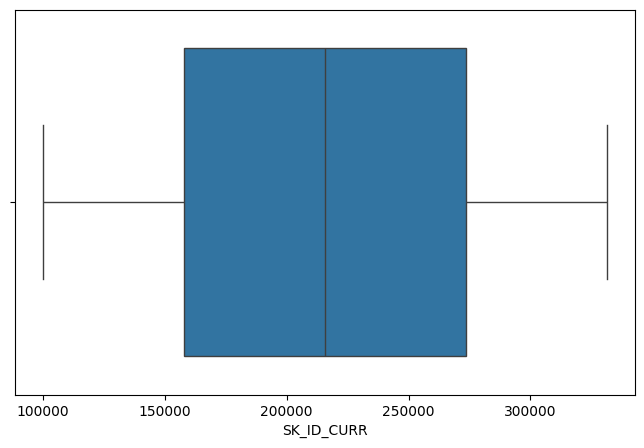

------------------------------------------------
count    199545.000000
mean          0.081215
std           0.273165
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64


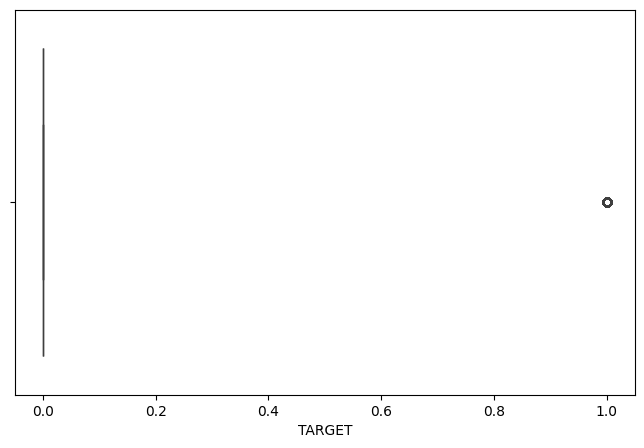

------------------------------------------------
count    199545.000000
mean          0.417375
std           0.723965
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


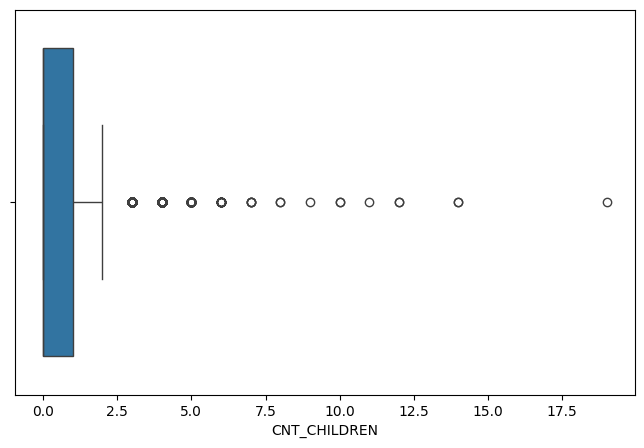

------------------------------------------------
count    199545.000000
mean      16036.708602
std        4367.451753
min        7673.000000
25%       12406.000000
50%       15748.000000
75%       19685.000000
max       25201.000000
Name: DAYS_BIRTH, dtype: float64


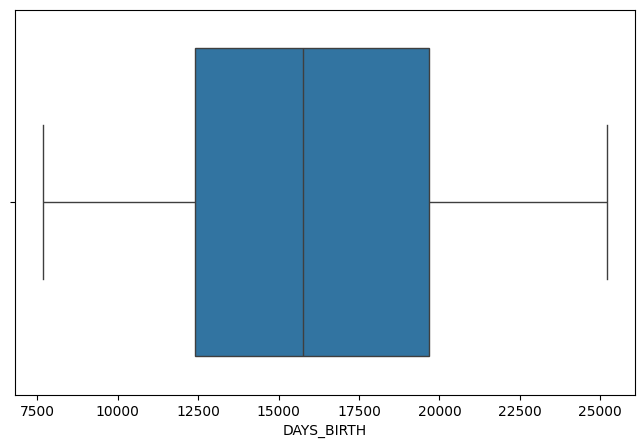

------------------------------------------------
count    199545.000000
mean      67703.879611
std      139431.345722
min           0.000000
25%         931.000000
50%        2216.000000
75%        5689.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


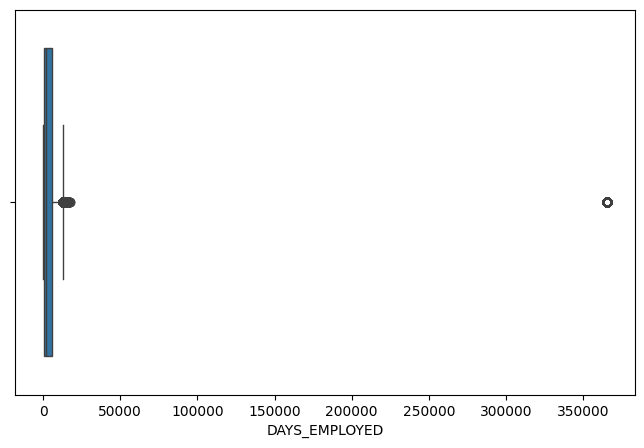

------------------------------------------------
count    199545.000000
mean      -4981.357634
std        3524.068945
min      -23738.000000
25%       -7469.000000
50%       -4491.000000
75%       -2006.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64


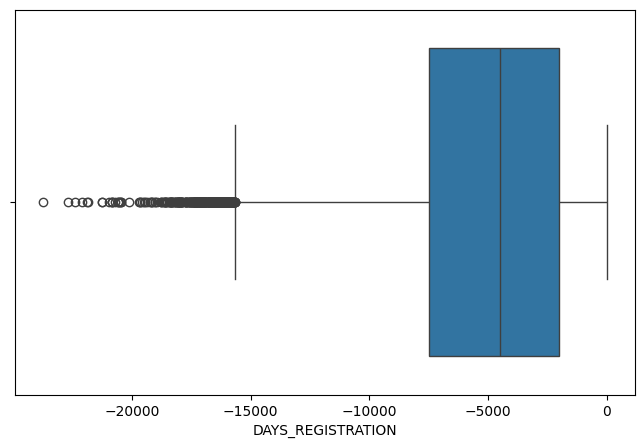

------------------------------------------------
count    199545.000000
mean      -2994.076038
std        1510.759971
min       -7197.000000
25%       -4299.000000
50%       -3256.000000
75%       -1716.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64


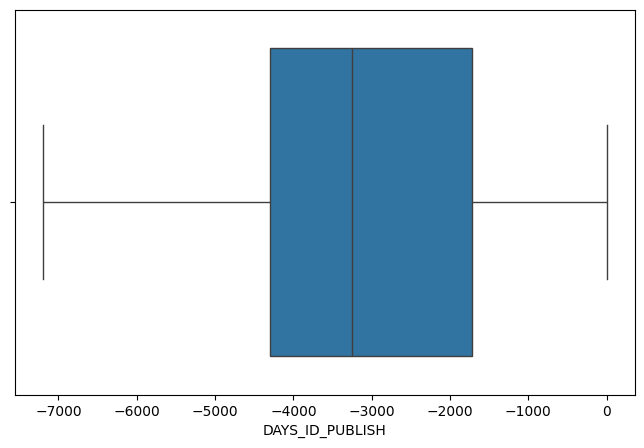

------------------------------------------------
count    199545.000000
mean          2.052479
std           0.509612
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64


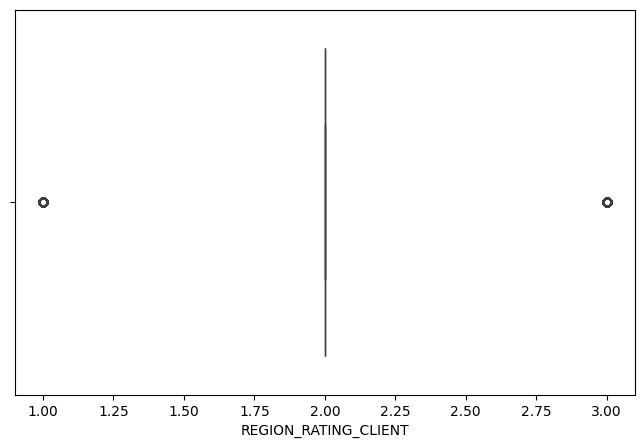

------------------------------------------------
count    199545.000000
mean         12.065379
std           3.264987
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


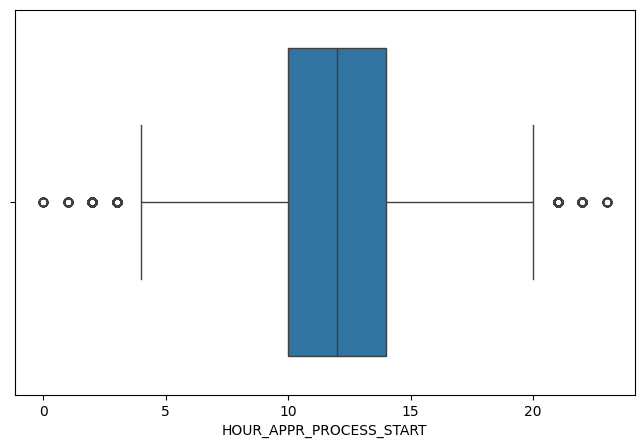

------------------------------------------------
count    199545.000000
mean          0.015220
std           0.122426
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64


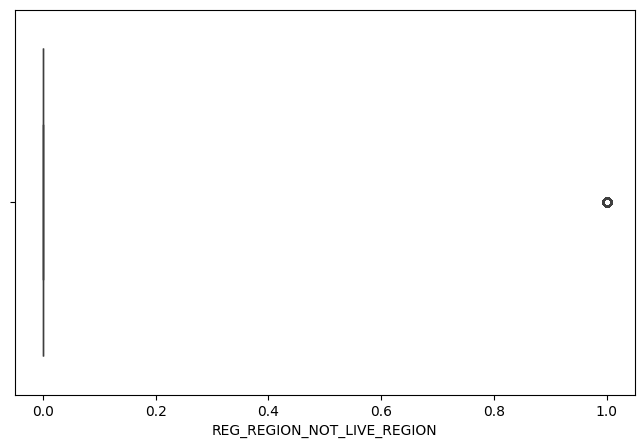

------------------------------------------------
count    199545.000000
mean          0.040542
std           0.197228
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64


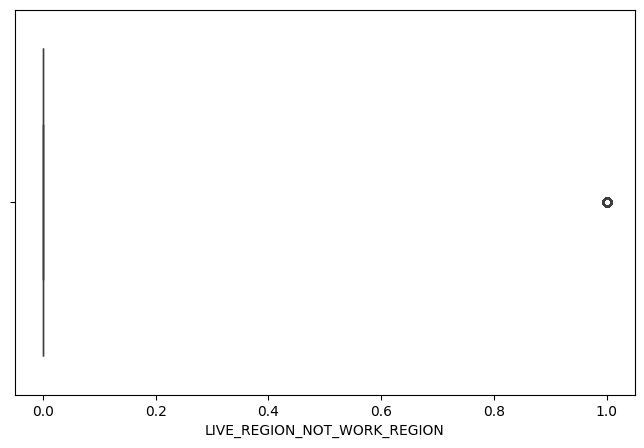

------------------------------------------------
count    199545.000000
mean         44.547891
std          12.273270
min          21.000000
25%          34.000000
50%          44.000000
75%          55.000000
max          70.000000
Name: YEARS_BIRTH, dtype: float64


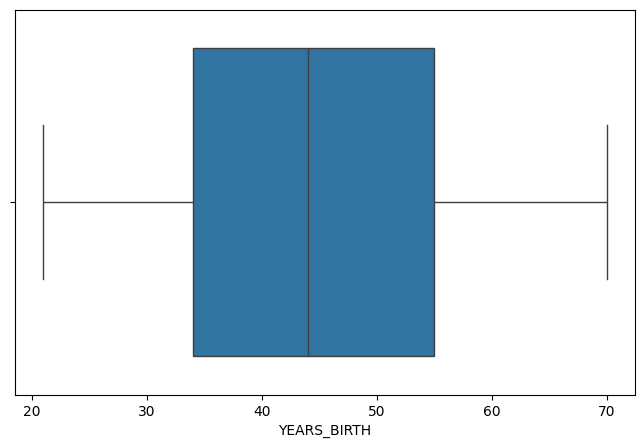

------------------------------------------------
count    199545.000000
mean        189.597539
std         391.482341
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1025.000000
Name: YEARS_EMPLOYED, dtype: float64


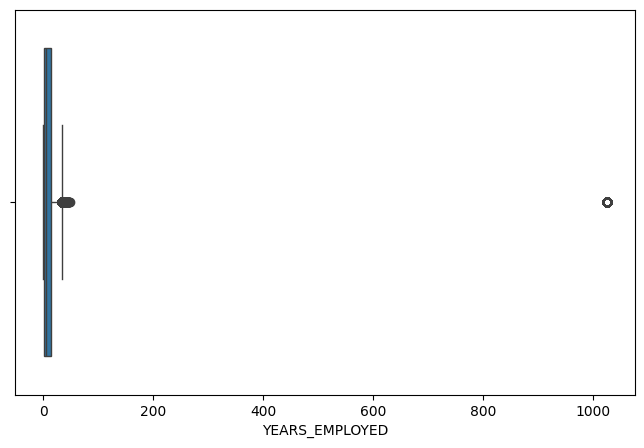

------------------------------------------------
count    1.995450e+05
mean     1.688705e+05
std      2.808584e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


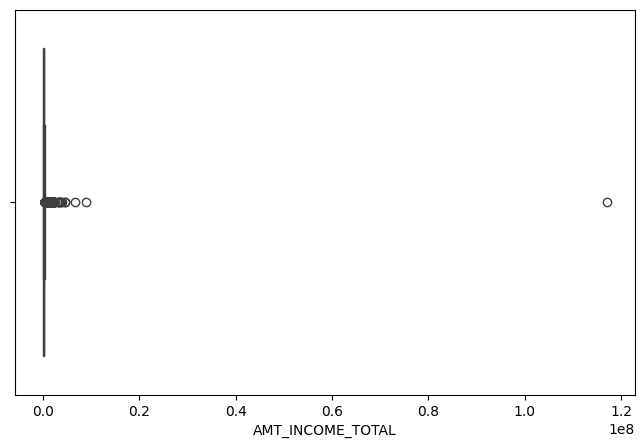

------------------------------------------------
count    1.995450e+05
mean     5.993479e+05
std      4.028471e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


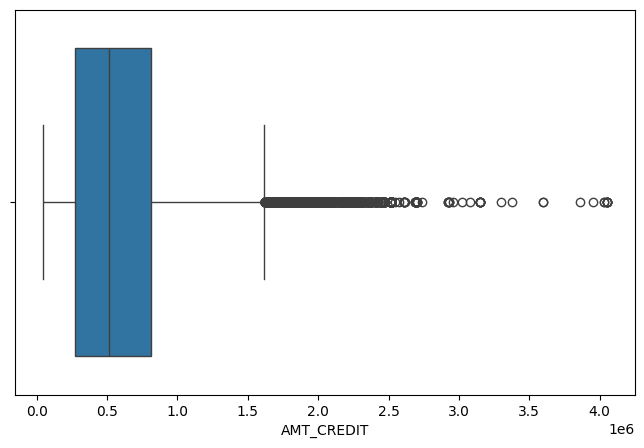

------------------------------------------------
count    199537.000000
mean      27123.320662
std       14540.346664
min        1980.000000
25%       16524.000000
50%       24916.500000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


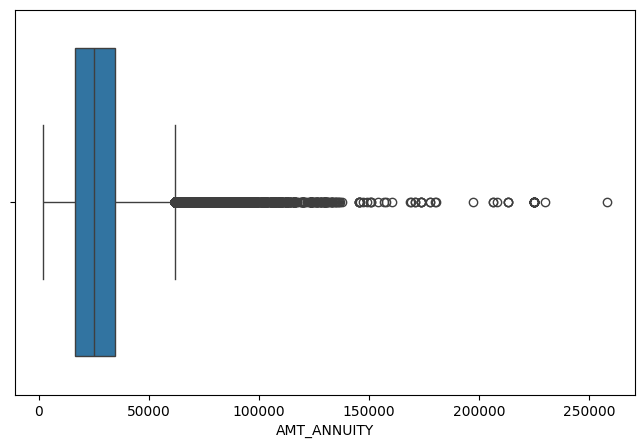

------------------------------------------------
count    1.993830e+05
mean     5.386198e+05
std      3.698938e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


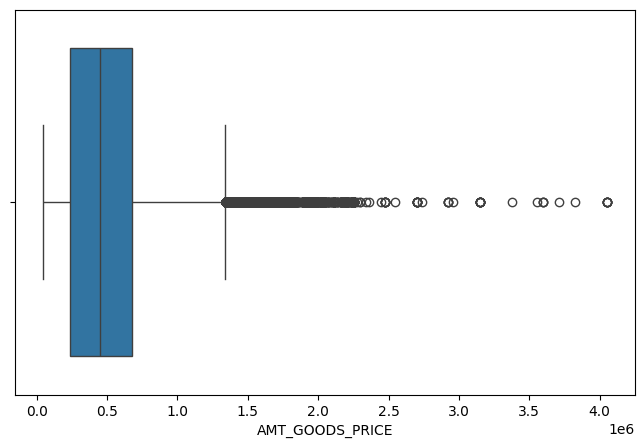

------------------------------------------------
count    199545.000000
mean          0.020875
std           0.013843
min           0.000533
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


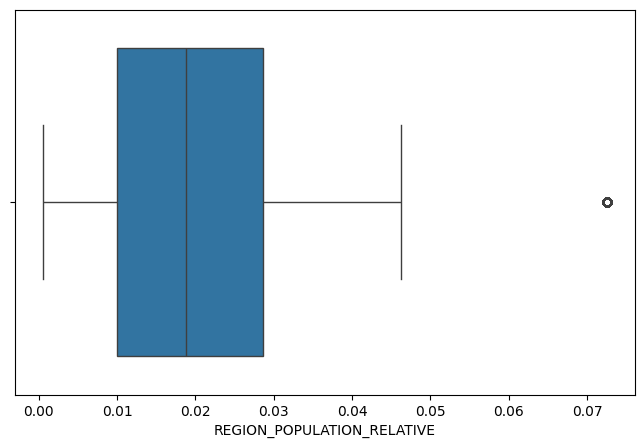

------------------------------------------------
count    67807.000000
mean        12.060333
std         11.936167
min          0.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         69.000000
Name: OWN_CAR_AGE, dtype: float64


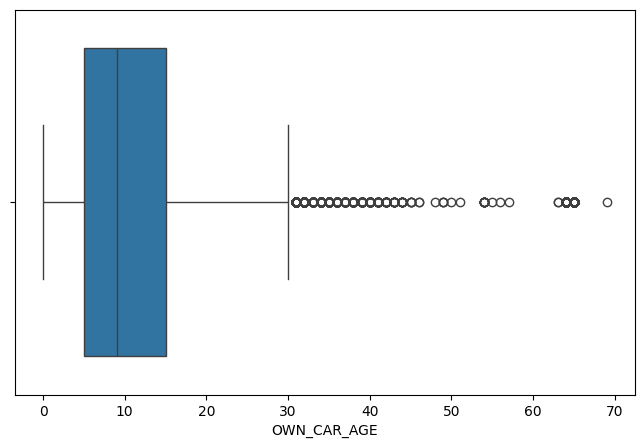

------------------------------------------------
count    199543.000000
mean          2.153857
std           0.912411
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


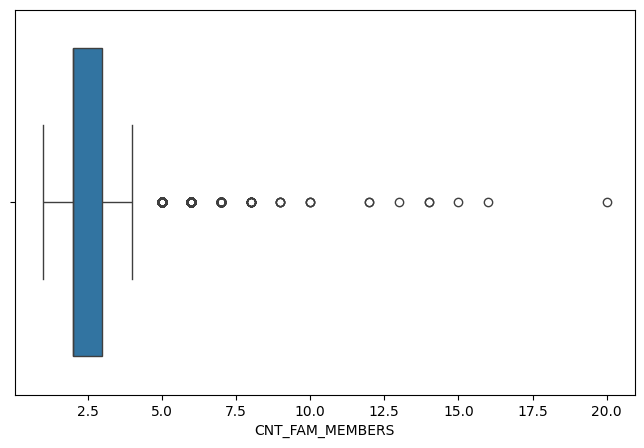

------------------------------------------------
count    199544.000000
mean       -961.633560
std         826.603108
min       -4292.000000
25%       -1569.000000
50%        -756.000000
75%        -273.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


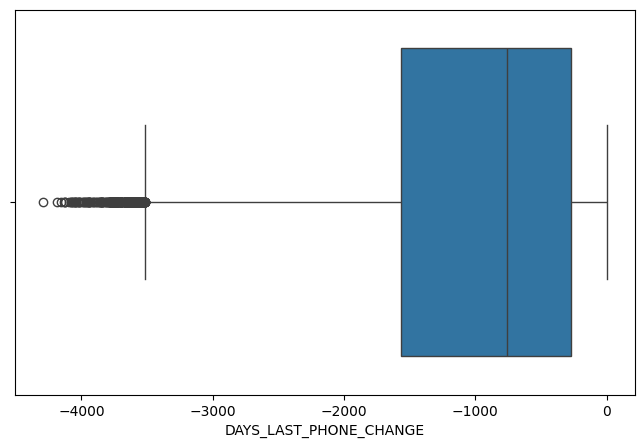

------------------------------------------------


In [180]:
for col in num_cols_withoutflag:
    print(app_data[col].describe())
    plt.figure(figsize=[8,5])
    sns.boxplot(data=app_data,x=col)
    plt.show()
    print("------------------------------------------------")

Plot on NAME_CONTRACT_TYPE for Target 0 and 1


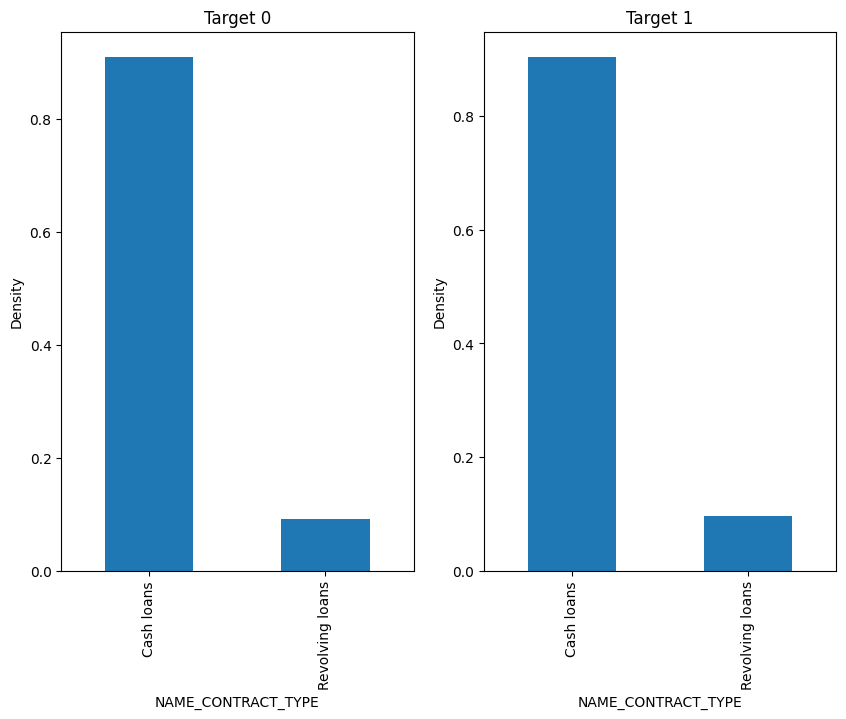

----------------------------------------------------------------
Plot on CODE_GENDER for Target 0 and 1


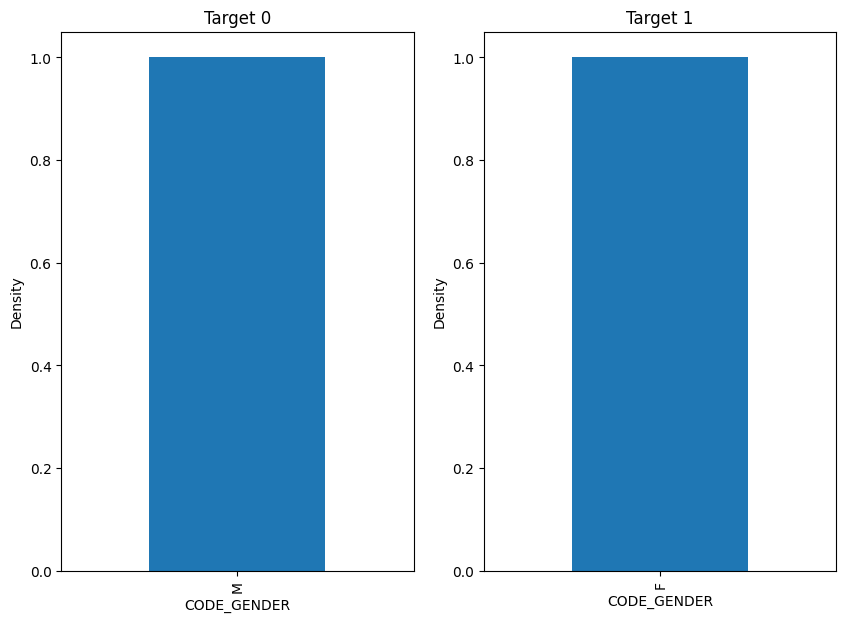

----------------------------------------------------------------
Plot on FLAG_OWN_CAR for Target 0 and 1


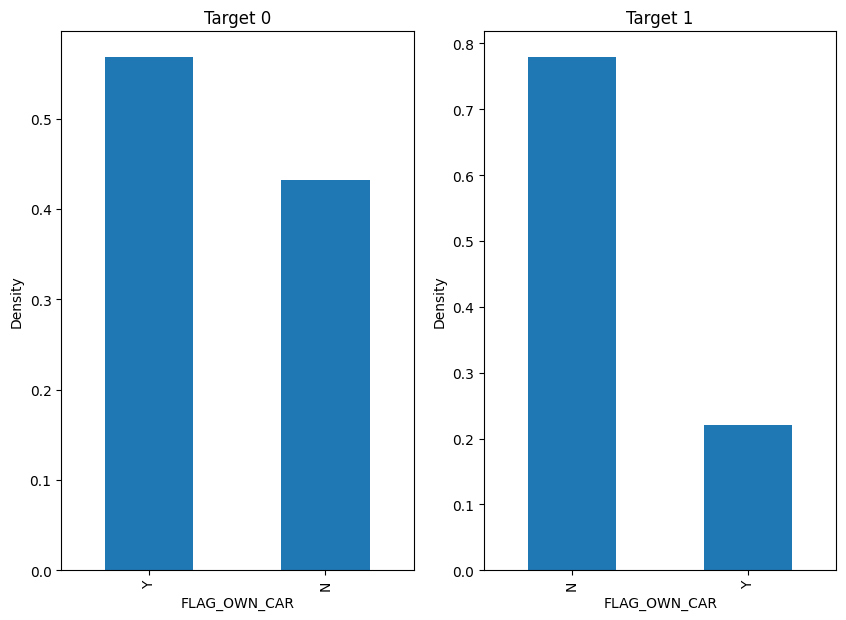

----------------------------------------------------------------
Plot on FLAG_OWN_REALTY for Target 0 and 1


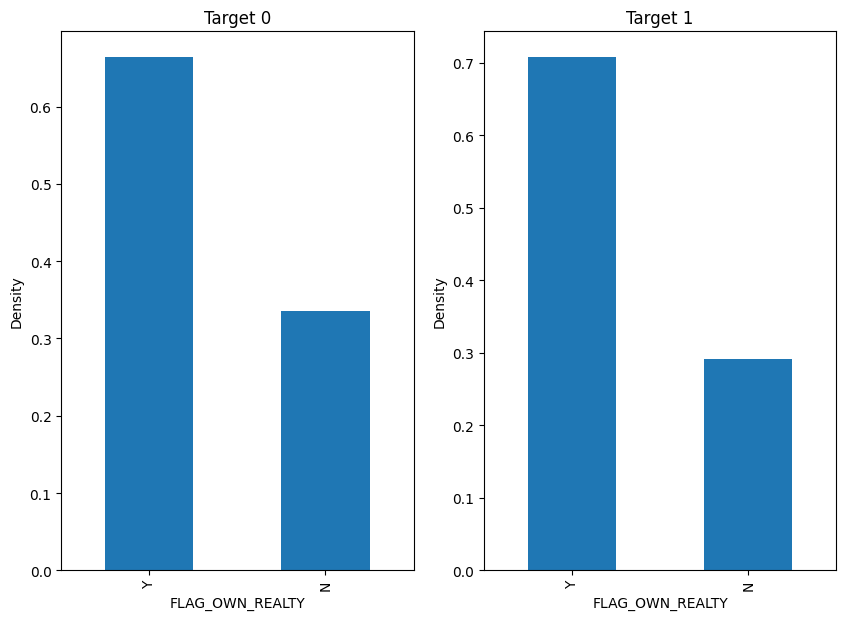

----------------------------------------------------------------
Plot on NAME_TYPE_SUITE for Target 0 and 1


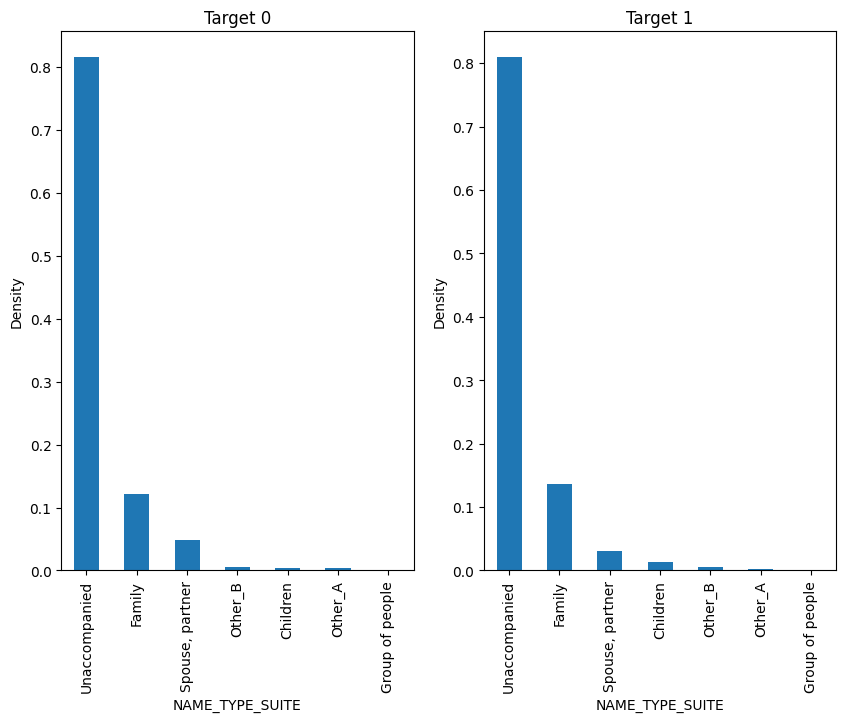

----------------------------------------------------------------
Plot on NAME_INCOME_TYPE for Target 0 and 1


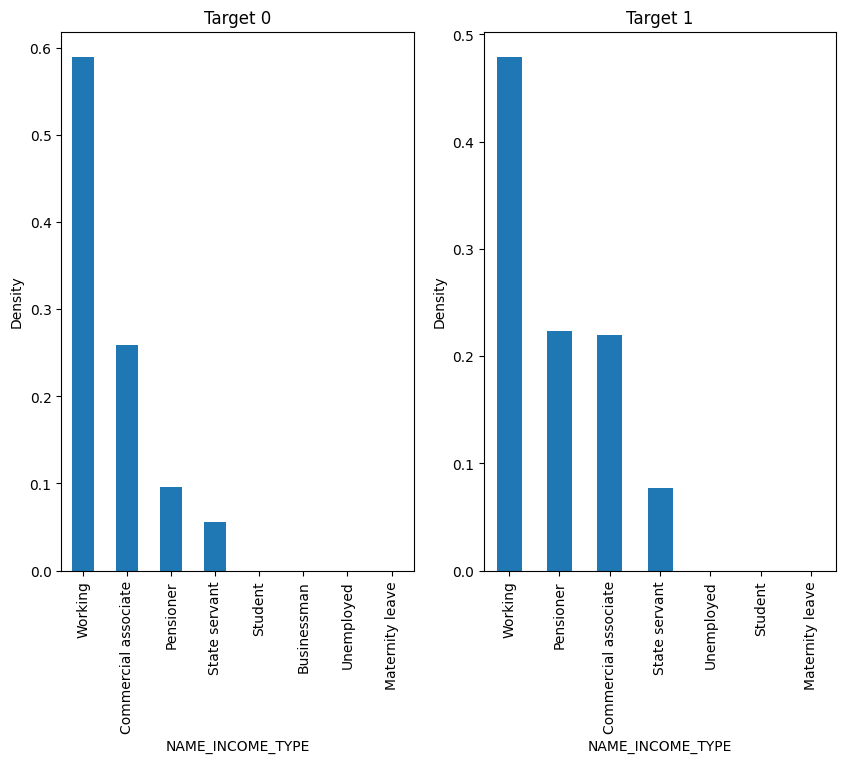

----------------------------------------------------------------
Plot on NAME_FAMILY_STATUS for Target 0 and 1


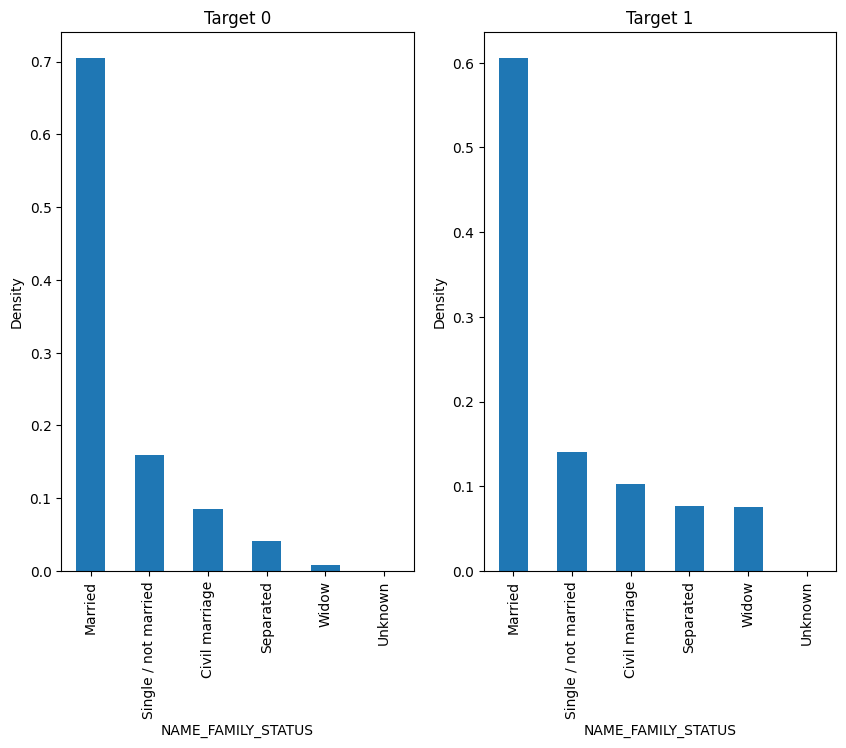

----------------------------------------------------------------
Plot on NAME_HOUSING_TYPE for Target 0 and 1


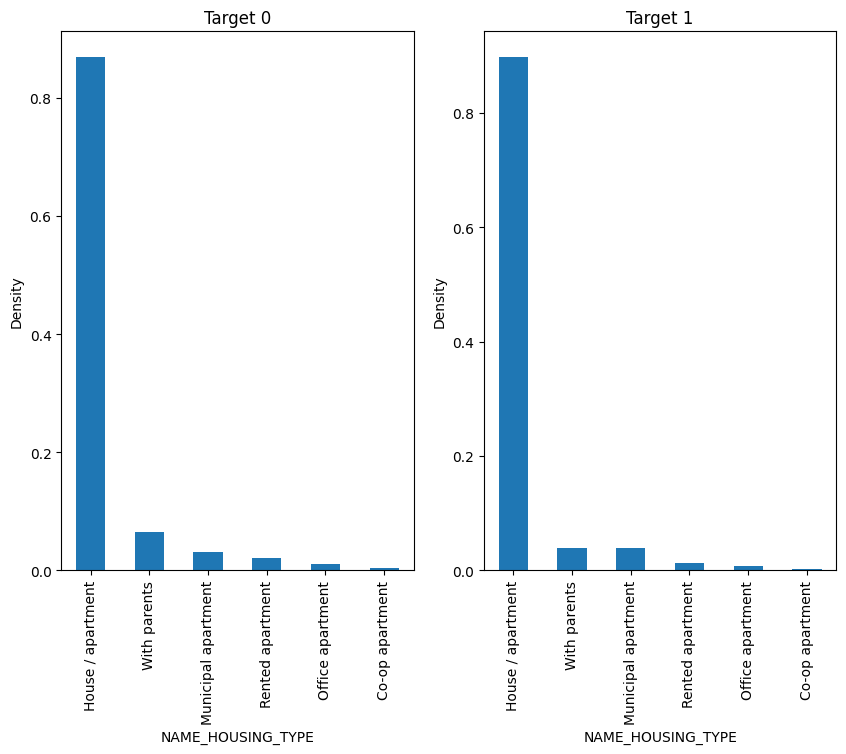

----------------------------------------------------------------
Plot on OCCUPATION_TYPE for Target 0 and 1


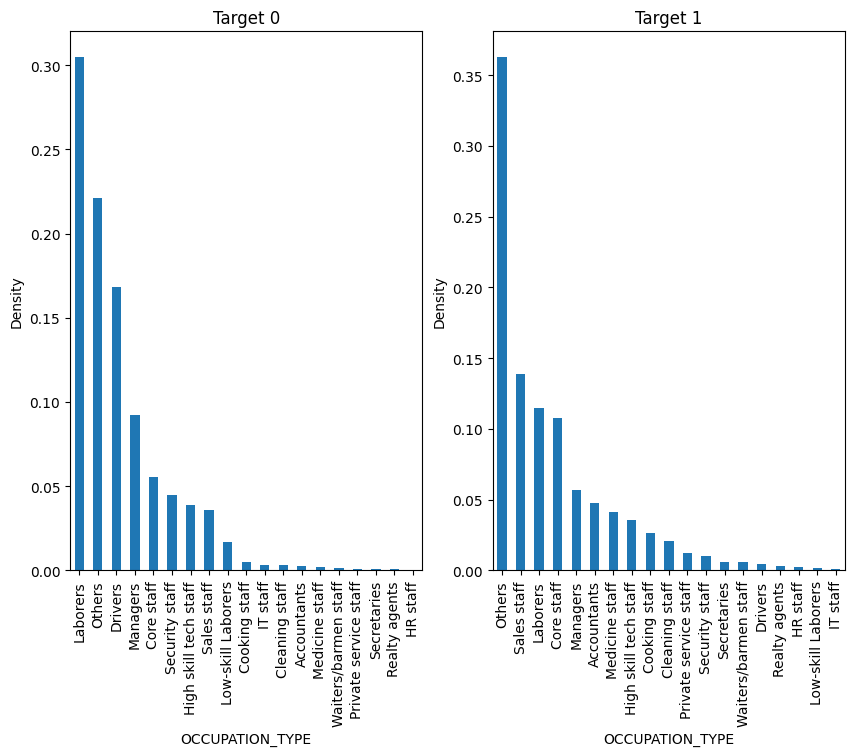

----------------------------------------------------------------
Plot on WEEKDAY_APPR_PROCESS_START for Target 0 and 1


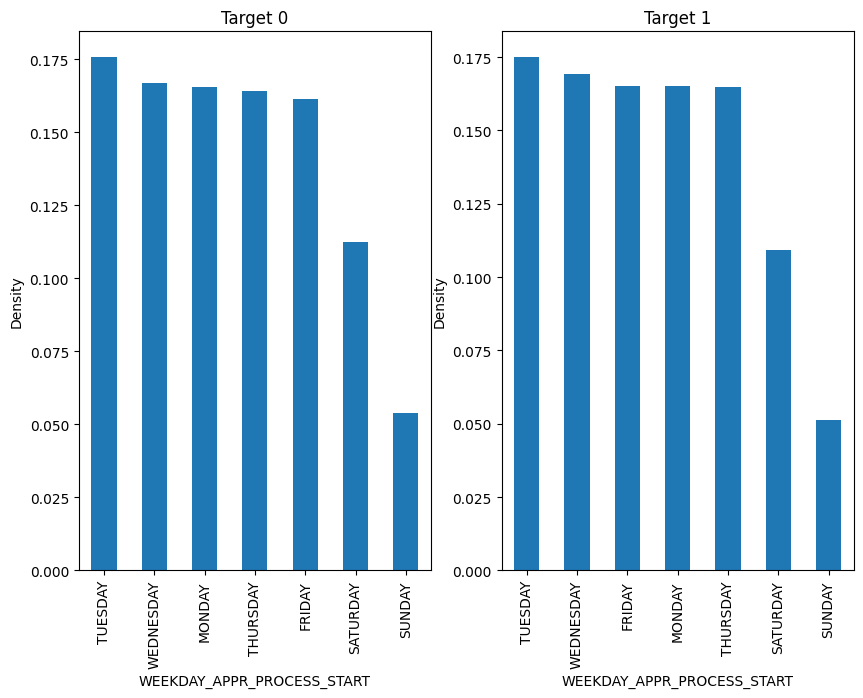

----------------------------------------------------------------


In [181]:
for col in cat_cols:
    print(f"Plot on {col} for Target 0 and 1")
    plt.figure(figsize=[10,7])
    plt.subplot(1,2,1)
    tar_0[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 0")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.subplot(1,2,2)
    tar_1[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 1")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()
    print("----------------------------------------------------------------")

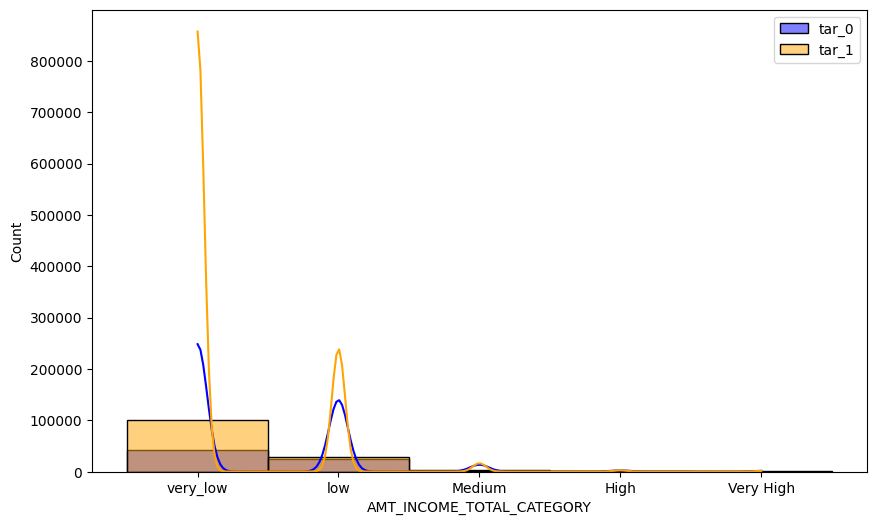

In [182]:
plt.figure(figsize=(10,6))
sns.histplot(tar_0['AMT_INCOME_TOTAL_CATEGORY'], label='tar_0', color='blue', kde=True)
sns.histplot(tar_1['AMT_INCOME_TOTAL_CATEGORY'], label='tar_1', color='orange', kde=True)
plt.legend()
plt.show()

Bivariate and multivariate analysis

<Axes: xlabel='WEEKDAY_APPR_PROCESS_START', ylabel='HOUR_APPR_PROCESS_START'>

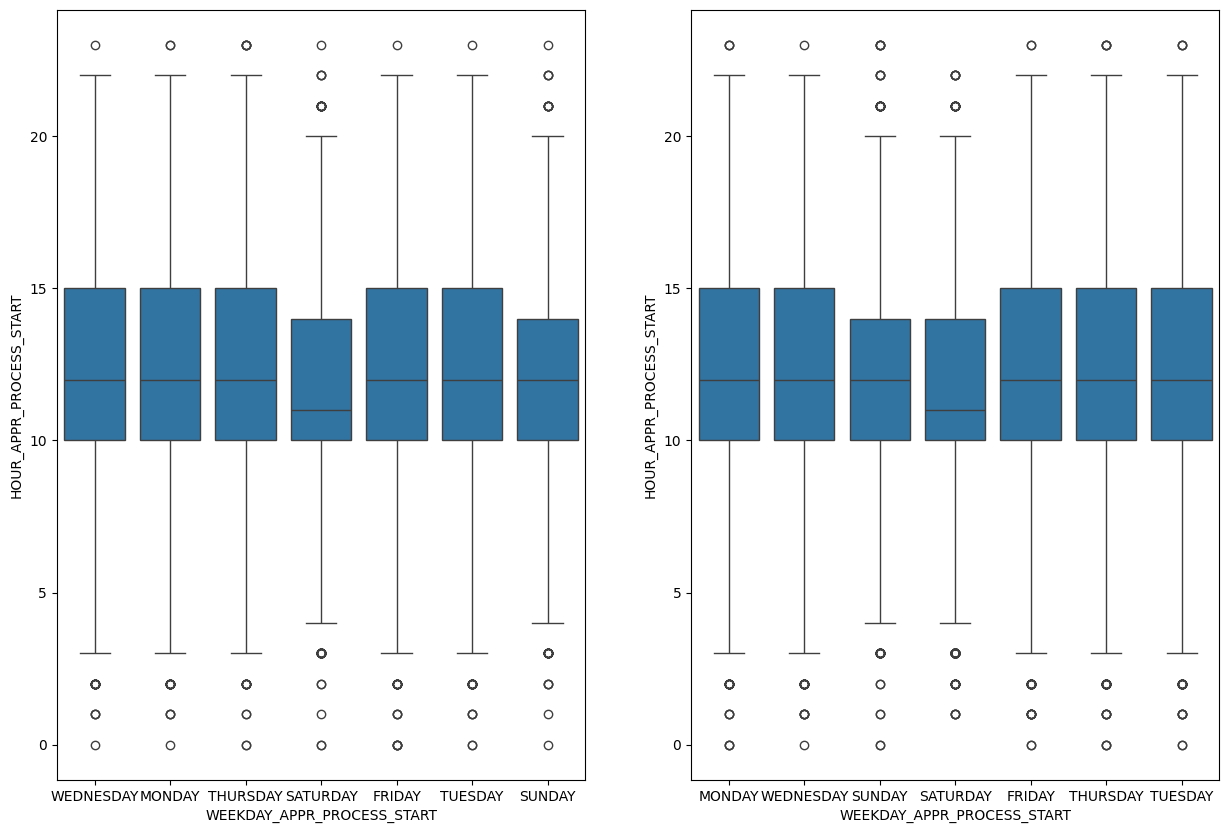

In [183]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x='WEEKDAY_APPR_PROCESS_START', y='HOUR_APPR_PROCESS_START', data=tar_0)
plt.subplot(1,2,2)
sns.boxplot(x='WEEKDAY_APPR_PROCESS_START', y='HOUR_APPR_PROCESS_START', data=tar_1)


Bivariate analysis between the AGE_CATEGORY Vs AMT_CREDIT

[]

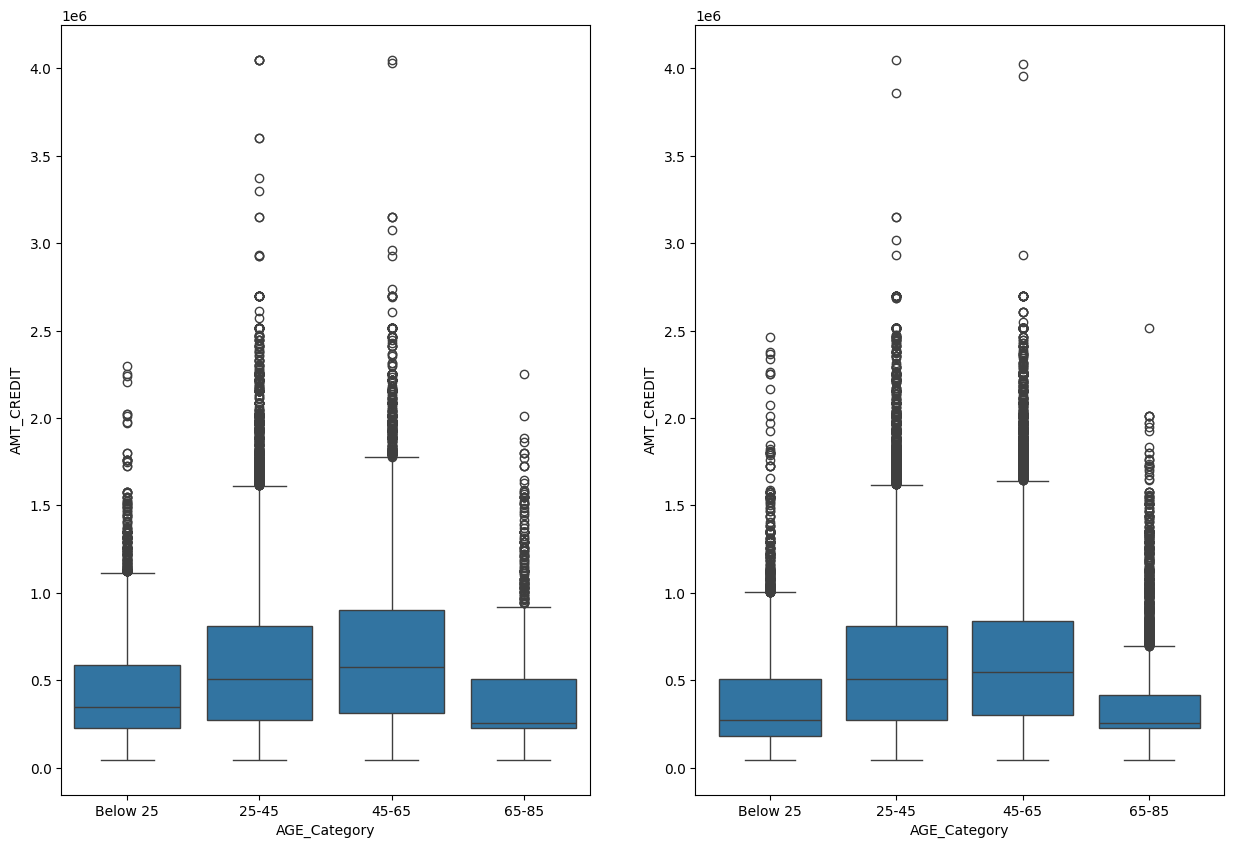

In [184]:
plt.figure(figsize =(15,10))
plt.subplot(1,2,1)
sns.boxplot(x='AGE_Category', y='AMT_CREDIT', data=tar_0)
plt.subplot(1,2,2)
sns.boxplot(x='AGE_Category', y='AMT_CREDIT', data=tar_1)
plt.plot()

PAIR PLOT AMOUNT Columns for Target 0

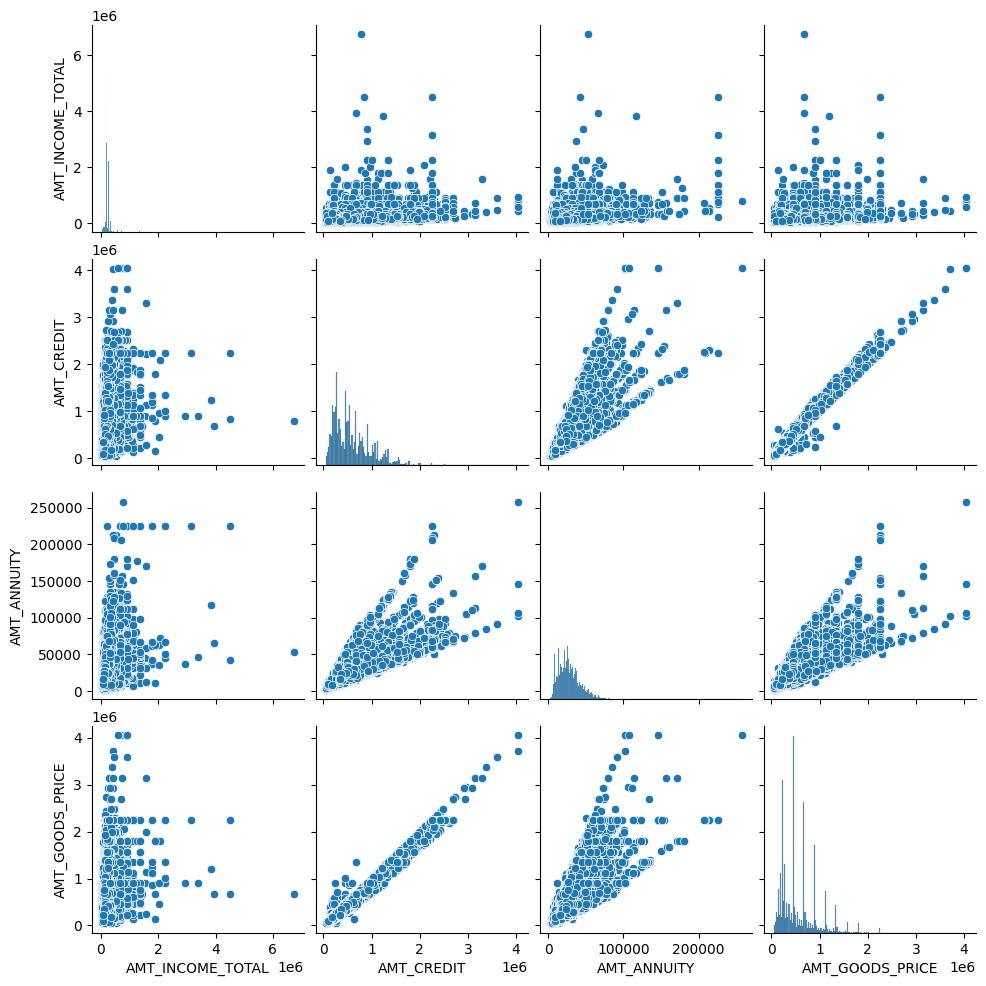

In [185]:
sns.pairplot(tar_0[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]])
plt.show()

PAIR PLOT FOR AMOUNT Columns Target 1

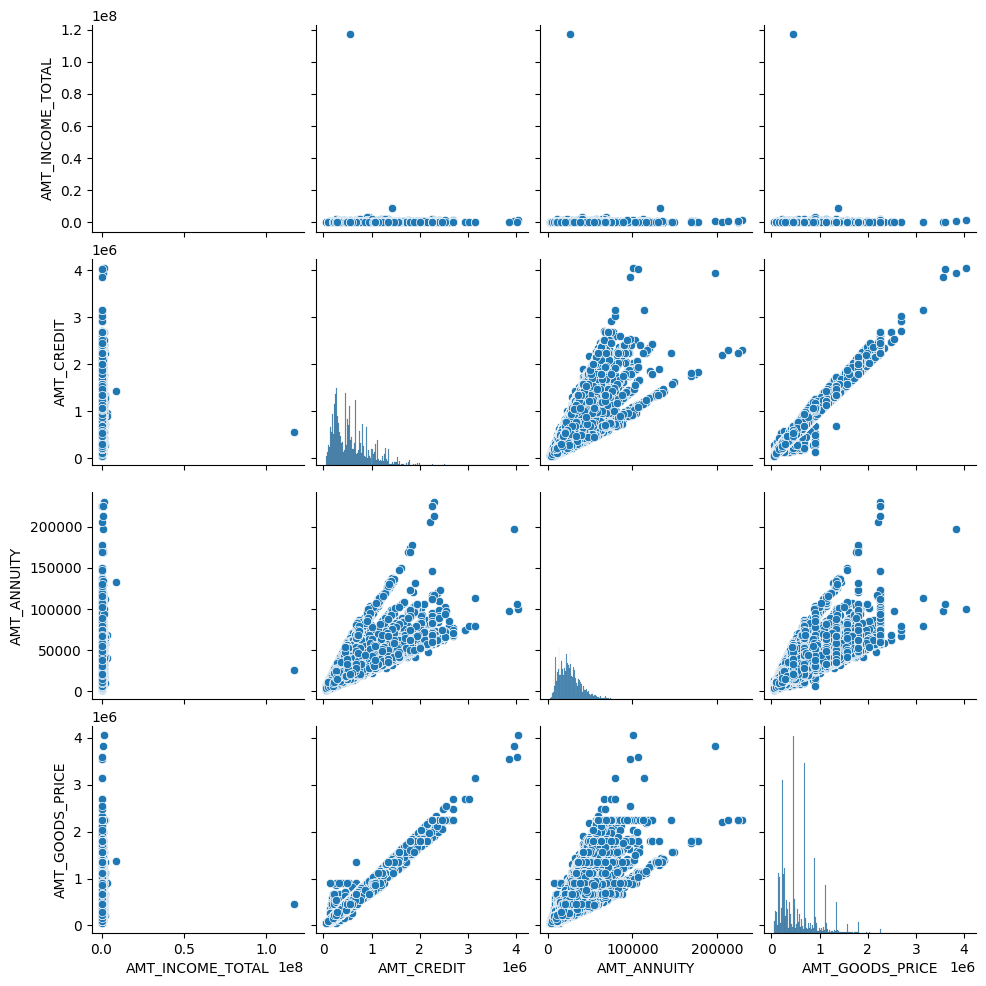

In [186]:
sns.pairplot(tar_1[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]])
plt.show()

Correlation between Numerical Columns

In [187]:
corr_data = app_data[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "YEARS_BIRTH", "YEARS_EMPLOYED"]]
corr_data.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED
0,202500.0,406597.5,24700.5,351000.0,26,1
1,270000.0,1293502.5,35698.5,1129500.0,47,3
2,67500.0,135000.0,6750.0,135000.0,53,0
3,135000.0,312682.5,29686.5,297000.0,53,8
4,121500.0,513000.0,21865.5,513000.0,55,8


In [188]:
corr_data.corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED
AMT_INCOME_TOTAL,1.000000,0.133094,0.162403,0.135339,-0.023411,-0.054594
AMT_CREDIT,0.133094,1.000000,0.770586,0.986938,0.055285,-0.065403
AMT_ANNUITY,0.162403,0.770586,1.000000,0.775766,-0.010148,-0.104549
AMT_GOODS_PRICE,0.135339,0.986938,0.775766,1.000000,0.053597,-0.062730
YEARS_BIRTH,-0.023411,0.055285,-0.010148,0.053597,1.000000,0.623953
YEARS_EMPLOYED,-0.054594,-0.065403,-0.104549,-0.062730,0.623953,1.000000


<Axes: >

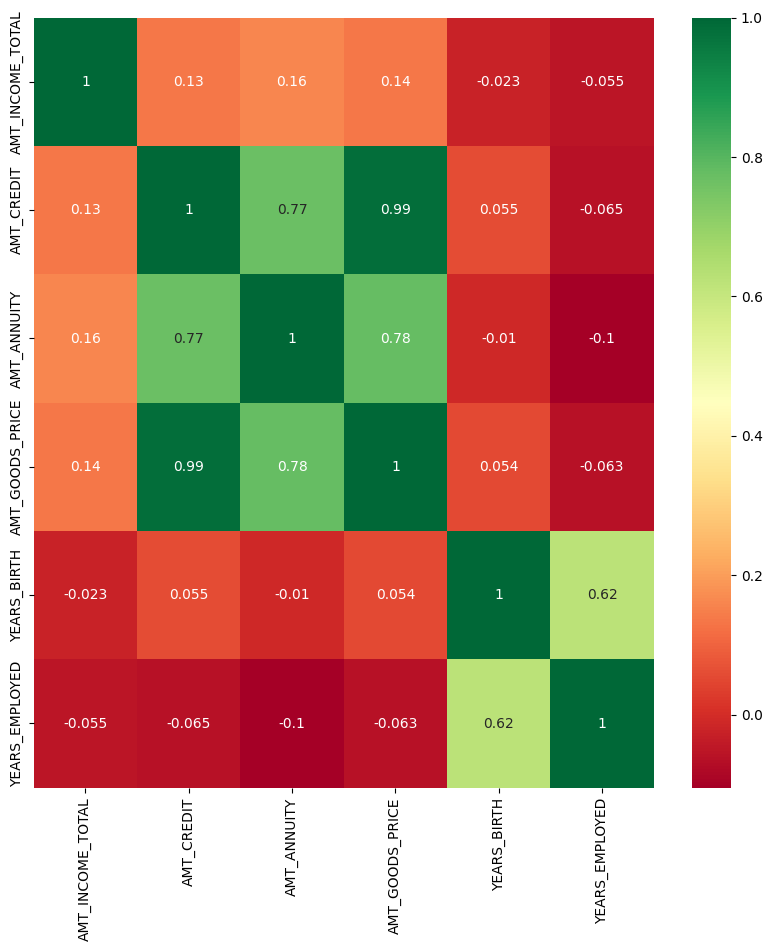

In [189]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data.corr(),annot=True, cmap="RdYlGn")

Split the numerical variable bases on targer 0 and 1 to find correlations

In [190]:
corr_data_0 = tar_0[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "YEARS_BIRTH", "YEARS_EMPLOYED"]]
corr_data.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED
0,202500.0,406597.5,24700.5,351000.0,26,1
1,270000.0,1293502.5,35698.5,1129500.0,47,3
2,67500.0,135000.0,6750.0,135000.0,53,0
3,135000.0,312682.5,29686.5,297000.0,53,8
4,121500.0,513000.0,21865.5,513000.0,55,8


In [191]:
corr_data_0.corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED
AMT_INCOME_TOTAL,1.000000,0.348625,0.433462,0.359142,-0.035847,-0.125120
AMT_CREDIT,0.348625,1.000000,0.742507,0.986969,0.108967,-0.029763
AMT_ANNUITY,0.433462,0.742507,1.000000,0.748418,0.031963,-0.072092
AMT_GOODS_PRICE,0.359142,0.986969,0.748418,1.000000,0.104722,-0.028360
YEARS_BIRTH,-0.035847,0.108967,0.031963,0.104722,1.000000,0.502662
YEARS_EMPLOYED,-0.125120,-0.029763,-0.072092,-0.028360,0.502662,1.000000


In [192]:
corr_data_1 = tar_1[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "YEARS_BIRTH", "YEARS_EMPLOYED"]]
corr_data.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED
0,202500.0,406597.5,24700.5,351000.0,26,1
1,270000.0,1293502.5,35698.5,1129500.0,47,3
2,67500.0,135000.0,6750.0,135000.0,53,0
3,135000.0,312682.5,29686.5,297000.0,53,8
4,121500.0,513000.0,21865.5,513000.0,55,8


<Axes: >

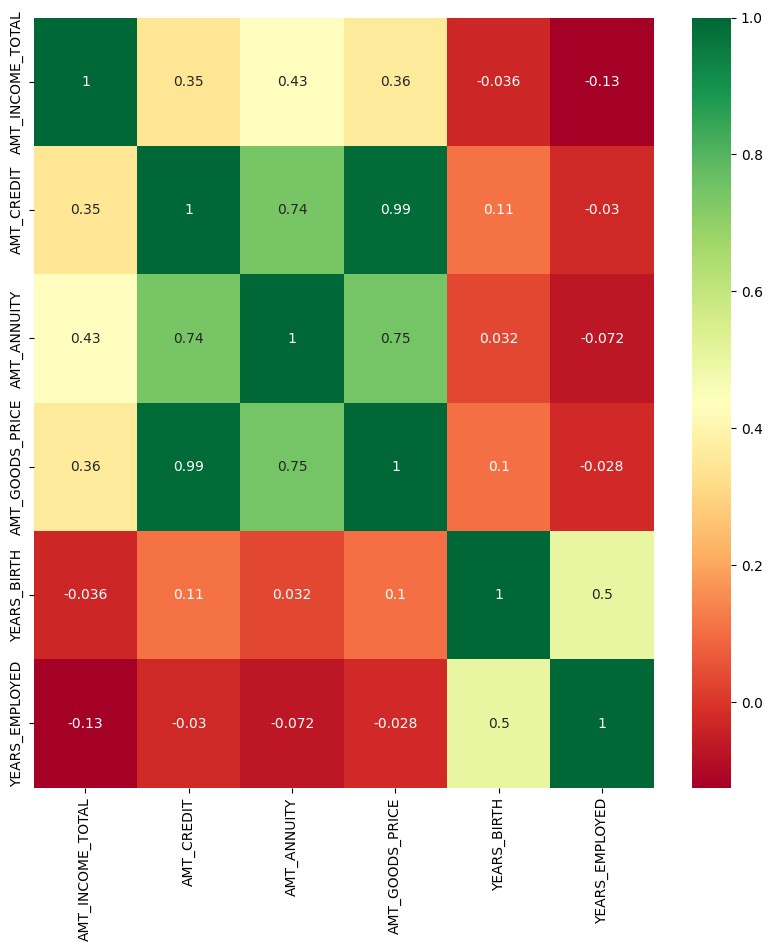

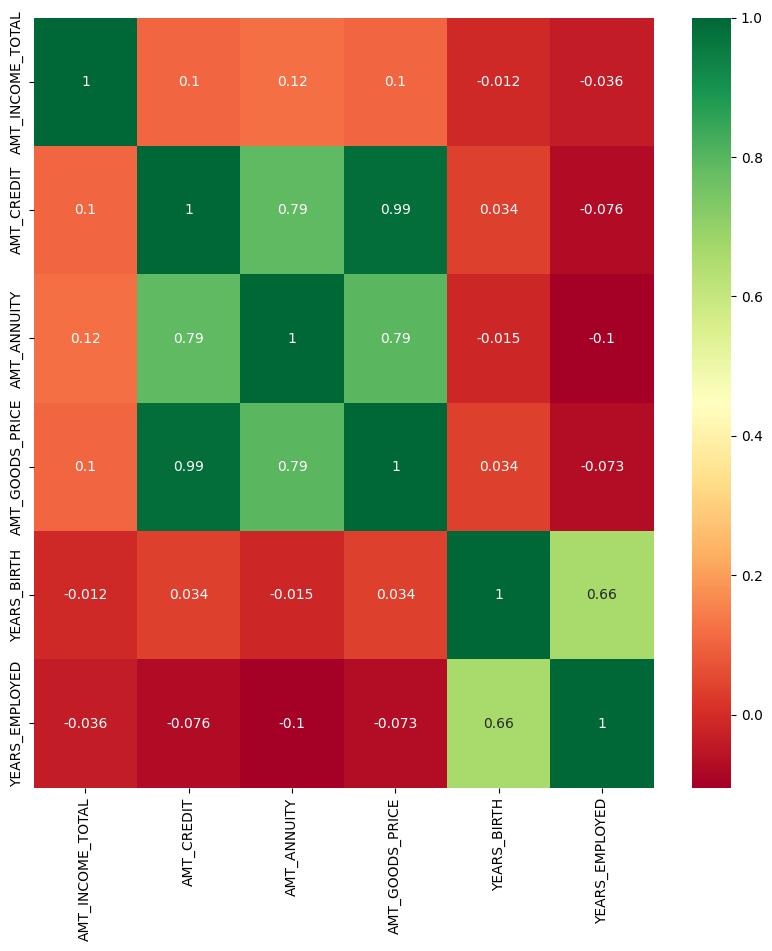

In [193]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_0.corr(),annot=True, cmap="RdYlGn")
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_1.corr(),annot=True, cmap="RdYlGn")

----------------------------------------------------------------

---->Now Working on Previous Application Dataset

In [194]:
papp_data= pd.read_csv("previous_application.csv")
papp_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
papp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [196]:
papp_data.shape

(1670214, 37)

In [197]:
papp_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [198]:
percentage_p = 49
threshold_p = int(((100 - percentage_p) / 100) * papp_data.shape[0] + 1)
papp_df = papp_data.dropna(axis= 1, thresh=threshold_p)
papp_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
papp_df.shape

(1670214, 32)

Impute missing values

In [200]:
for col in papp_df.columns:
    if papp_df[col].dtype == np.int64 or papp_df[col].dtype == np.float64:
        papp_df[col] = papp_df[col].apply(lambda x: abs(x))

In [201]:
null_Cols = list(papp_df.columns[papp_df.isna().any()])
len(null_Cols)

11

In [202]:
papp_df.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [203]:
papp_df.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

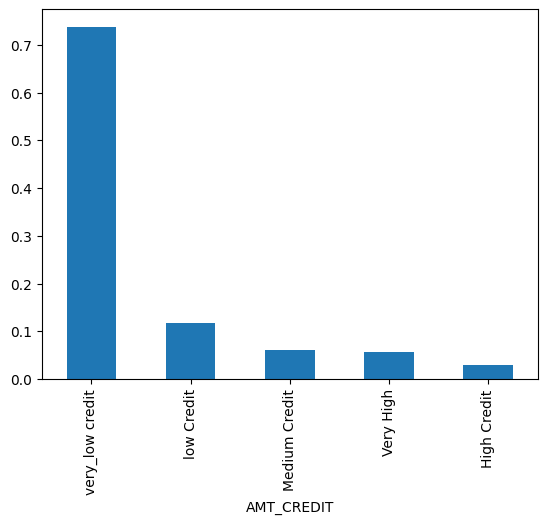

In [204]:
papp_df["AMT_CREDIT"] = pd.cut(papp_df.AMT_CREDIT, [0,200000,400000,600000,800000,10000000], labels= ["very_low credit", "low Credit","Medium Credit", "High Credit", "Very High"], include_lowest=True)
papp_df["AMT_CREDIT"].value_counts(normalize=True).plot.bar()
plt.show()

The Bar graphs show how the AMT_CREDIT variable is computed for 5 parameters as per the labels given over papp_df

In [205]:
papp_df["AMT_GOODS_PRICE_Category"] = pd.cut(papp_df.AMT_GOODS_PRICE, [0, 40000, 90000, 125000, 175000, 200000], labels=["very_low", "low", "Medium", "High", "Very High"])

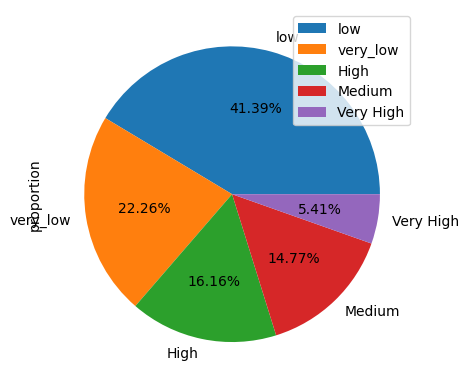

In [206]:
papp_df.AMT_GOODS_PRICE_Category.value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.legend()
plt.show()

Dividing application dataset with NAME_CONTRACT_STATUS

In [207]:
approved = papp_df[papp_df.NAME_CONTRACT_STATUS == 'Approved']
cancelled = papp_df[papp_df.NAME_CONTRACT_STATUS == 'cancelled']
refused = papp_df[papp_df.NAME_CONTRACT_STATUS == 'Refused']
unused = papp_df[papp_df.NAME_CONTRACT_STATUS == 'Unused offer']
papp_df.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

NAME_CONTRACT_STATUS
Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: proportion, dtype: float64

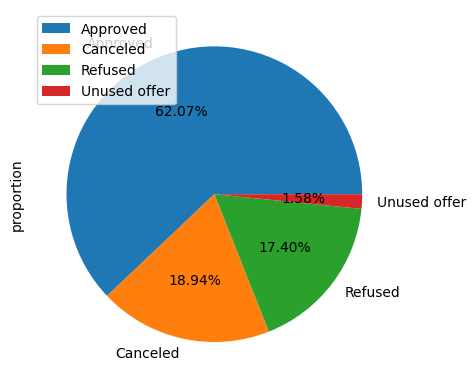

In [208]:
papp_df.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.legend()
plt.show()

Conclusion above 62% are approved whereas 1.58% are unused and 17.4% are rejected remaining are cancelled

-> Univariate Analysis

In [209]:
cat_cols = list(papp_df.columns[papp_df.dtypes == np.object_])
num_cols = list(papp_df.columns[papp_df.dtypes == np.int64]) + list(papp_df.columns[papp_df.dtypes == np.float64])

In [210]:
cat_cols = ["NAME_CONTRACT_TYPE", "WEEKDAY_APPR_PROCESS_START", "NAME_CONTRACT_STATUS", "NAME_PAYMENT_TYPE","NAME_CLIENT_TYPE", "NAME_SELLER_INDUSTRY", "CHANNEL_TYPE", "NAME_YIELD_GROUP", "PRODUCT_COMBINATION"]

In [211]:
num_cols= ["HOUR_APPR_PROCESS_START", "DAYS_DECISION", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_GOODS_PRICE", "CNT_PAYMENT"]

NAME_CONTRACT_TYPE
Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
XNA                0.000207
Name: proportion, dtype: float64


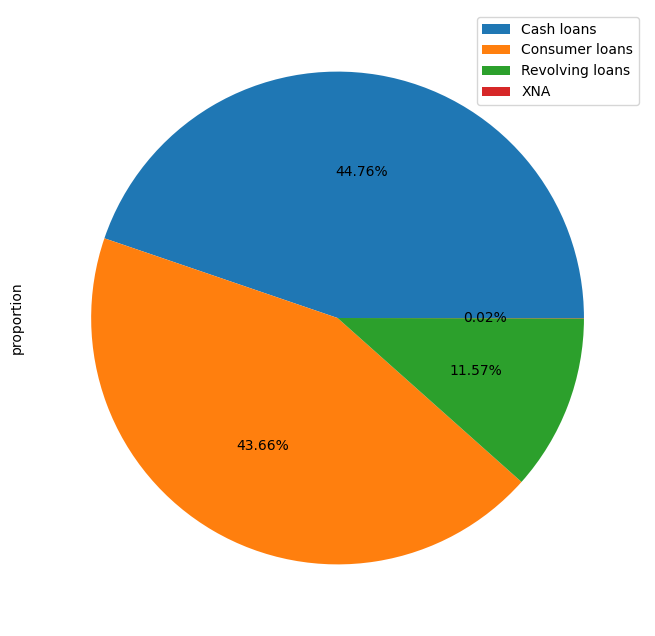

----------------------------------------------------------------
WEEKDAY_APPR_PROCESS_START
TUESDAY      0.152746
WEDNESDAY    0.152681
MONDAY       0.151811
FRIDAY       0.150908
THURSDAY     0.149142
SATURDAY     0.144072
SUNDAY       0.098641
Name: proportion, dtype: float64


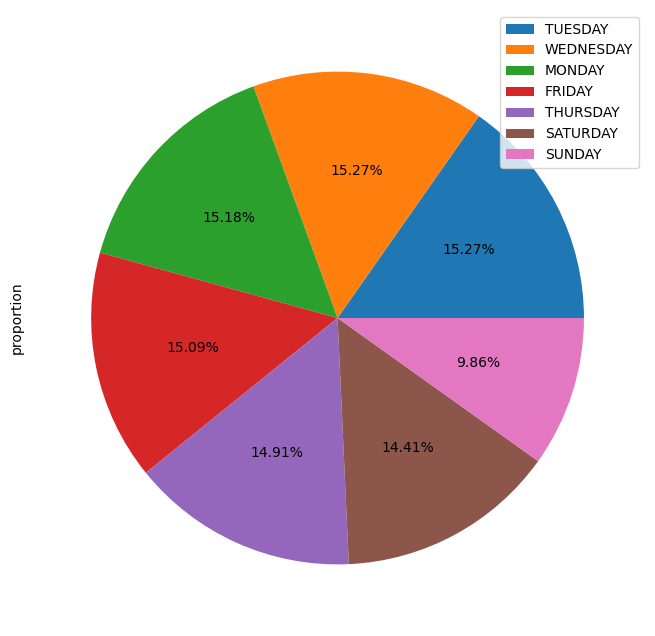

----------------------------------------------------------------
NAME_CONTRACT_STATUS
Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: proportion, dtype: float64


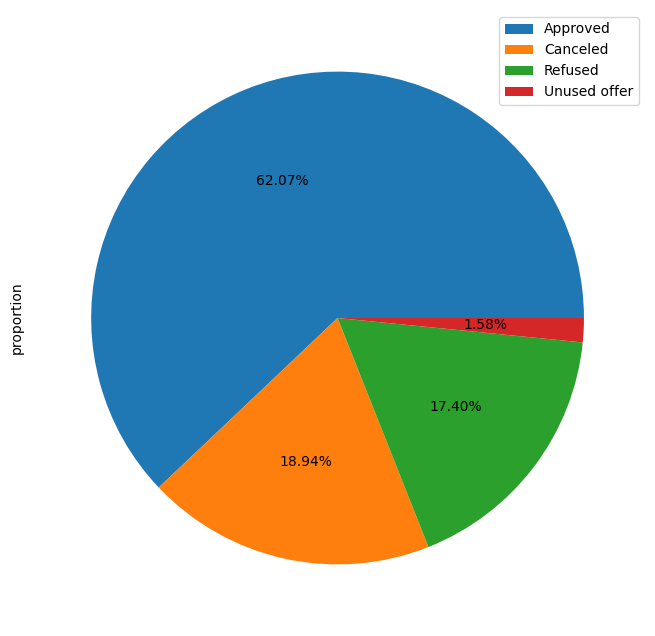

----------------------------------------------------------------
NAME_PAYMENT_TYPE
Cash through the bank                        0.618814
XNA                                          0.375631
Non-cash from your account                   0.004905
Cashless from the account of the employer    0.000650
Name: proportion, dtype: float64


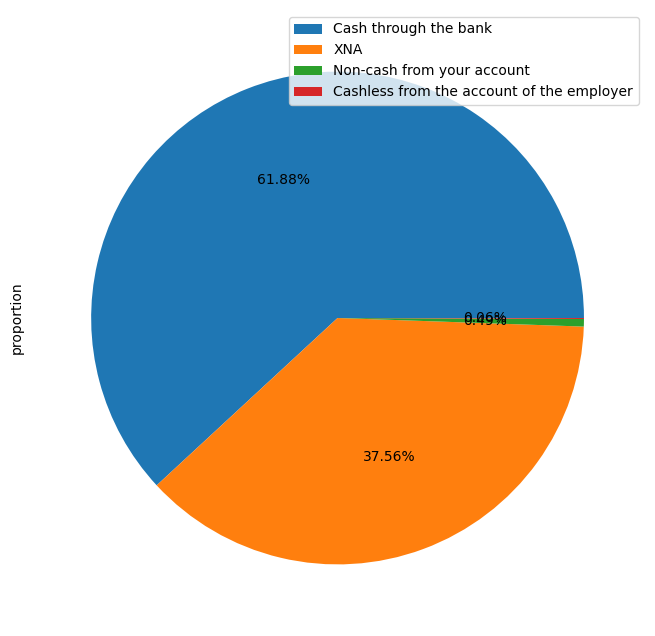

----------------------------------------------------------------
NAME_CLIENT_TYPE
Repeater     0.737188
New          0.180434
Refreshed    0.081217
XNA          0.001162
Name: proportion, dtype: float64


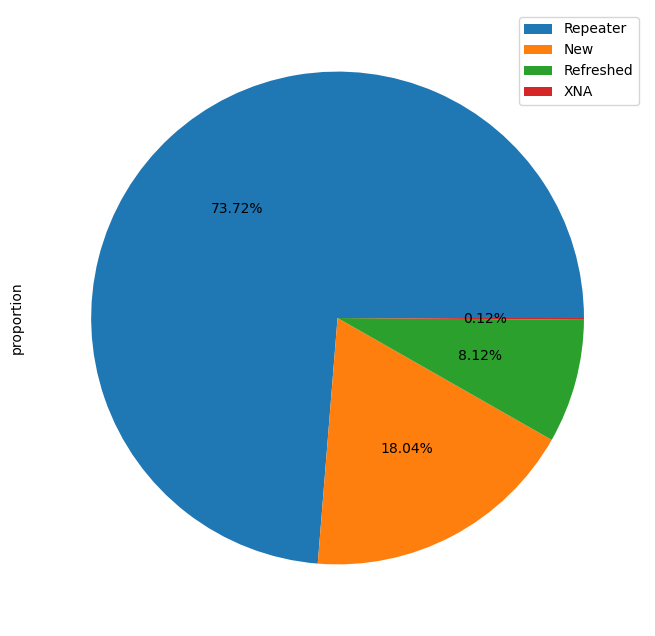

----------------------------------------------------------------
NAME_SELLER_INDUSTRY
XNA                     0.512342
Consumer electronics    0.238451
Connectivity            0.165266
Furniture               0.034636
Construction            0.017831
Clothing                0.014339
Industry                0.011492
Auto technology         0.002988
Jewelry                 0.001622
MLM partners            0.000727
Tourism                 0.000307
Name: proportion, dtype: float64


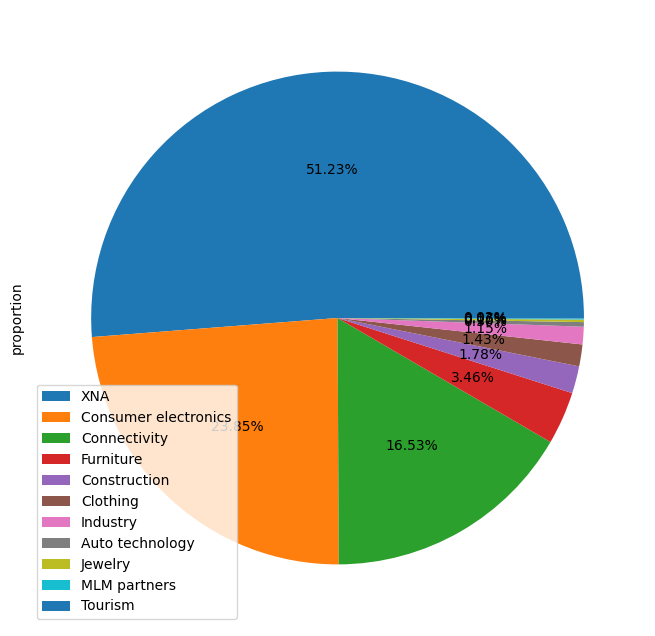

----------------------------------------------------------------
CHANNEL_TYPE
Credit and cash offices       0.431063
Country-wide                  0.296184
Stone                         0.126980
Regional / Local              0.064978
Contact center                0.042687
AP+ (Cash loan)               0.034155
Channel of corporate sales    0.003682
Car dealer                    0.000271
Name: proportion, dtype: float64


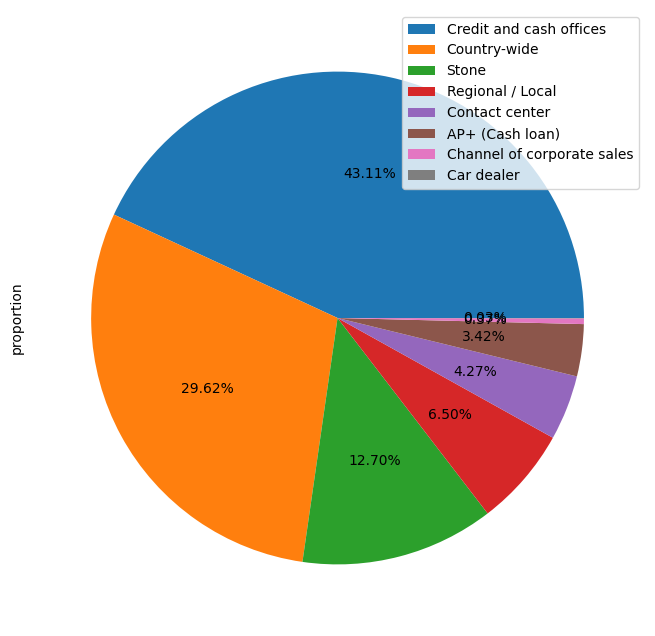

----------------------------------------------------------------
NAME_YIELD_GROUP
XNA           0.309670
middle        0.230828
high          0.211548
low_normal    0.192847
low_action    0.055107
Name: proportion, dtype: float64


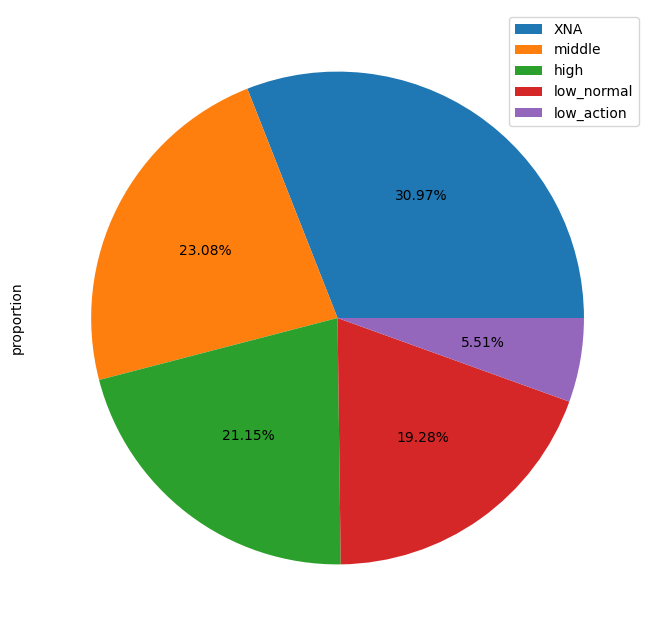

----------------------------------------------------------------
PRODUCT_COMBINATION
Cash                              0.171265
POS household with interest       0.157870
POS mobile with interest          0.132148
Cash X-Sell: middle               0.086164
Cash X-Sell: low                  0.077999
Card Street                       0.067420
POS industry with interest        0.059186
POS household without interest    0.049649
Card X-Sell                       0.048257
Cash Street: high                 0.035715
Cash X-Sell: high                 0.035512
Cash Street: middle               0.020755
Cash Street: low                  0.020261
POS mobile without interest       0.014421
POS other with interest           0.014300
POS industry without interest     0.007547
POS others without interest       0.001530
Name: proportion, dtype: float64


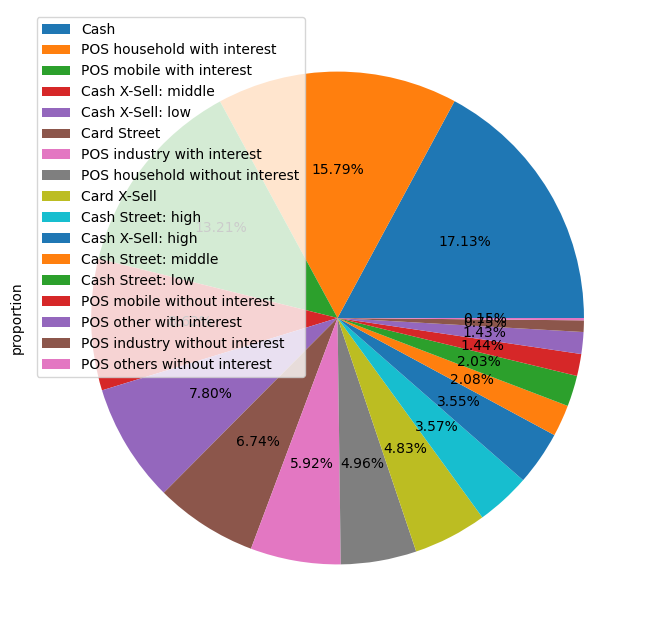

----------------------------------------------------------------


In [212]:
for col in cat_cols:
    print(papp_df[col].value_counts(normalize=True*100))
    plt.figure(figsize=[10,8])
    papp_df[col].value_counts(normalize=True*100).plot.pie(labeldistance= None,autopct = '%1.2f%%')
    plt.legend()
    plt.show()
    print("----------------------------------------------------------------")

ABOVE ARE THE PIE CHARTS WHICH SHOW HOW THE VARIOUS CATEGORY COLUMNS HAVE VALUES FOR DIFFERENT VALUES IN THAT COLUMN

In [213]:
num_cols

['HOUR_APPR_PROCESS_START',
 'DAYS_DECISION',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_GOODS_PRICE',
 'CNT_PAYMENT']

NOW BELOW ARE THE BOXPLOT RELATED TO THE NUMERICAL VALUED COLUMNS AND THERE VALUES IN THE RESPECTIVE COLUMNS

99th Percentile 20.0
count    1.670214e+06
mean     1.248418e+01
std      3.334028e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64


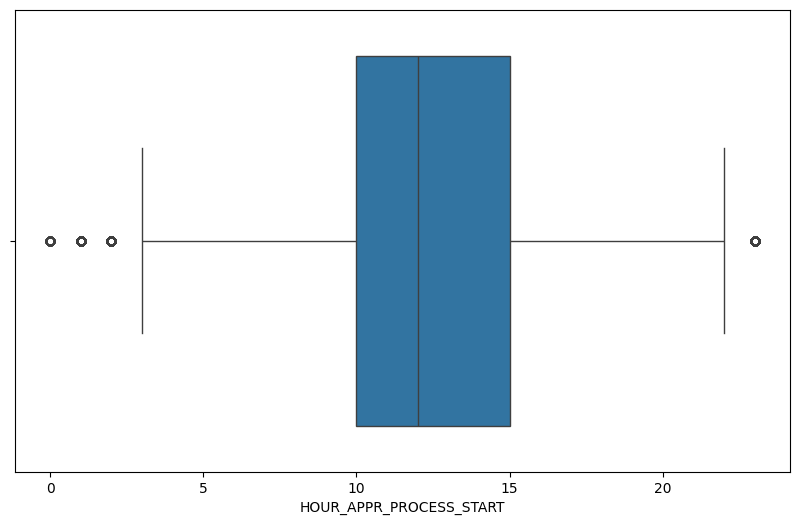

----------------------------------------------------------------
99th Percentile 2835.0
count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64


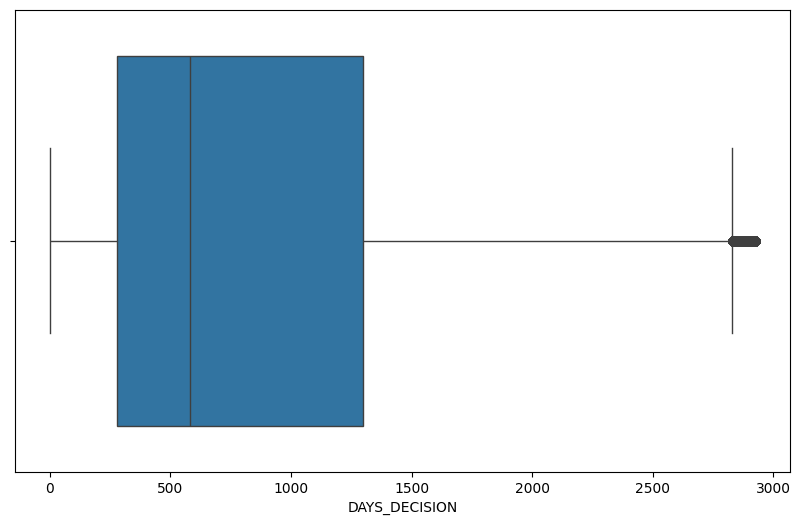

----------------------------------------------------------------
99th Percentile nan
count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64


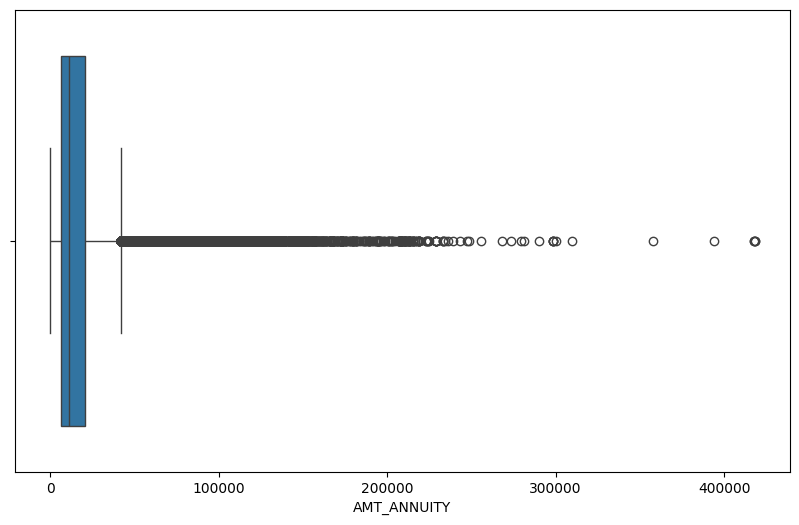

----------------------------------------------------------------
99th Percentile 1350000.0
count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64


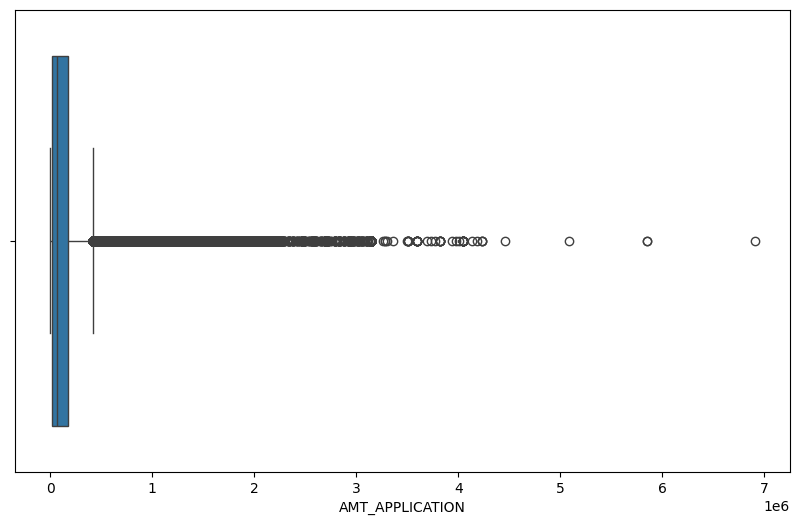

----------------------------------------------------------------
99th Percentile nan
count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64


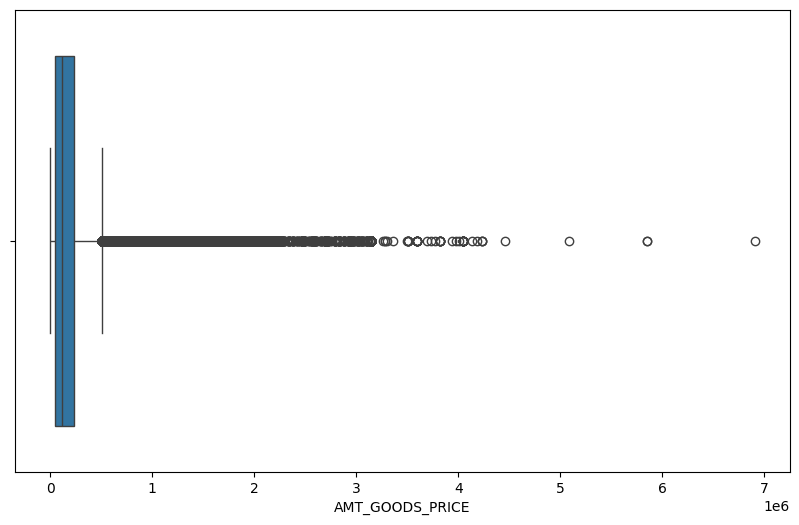

----------------------------------------------------------------
99th Percentile nan
count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64


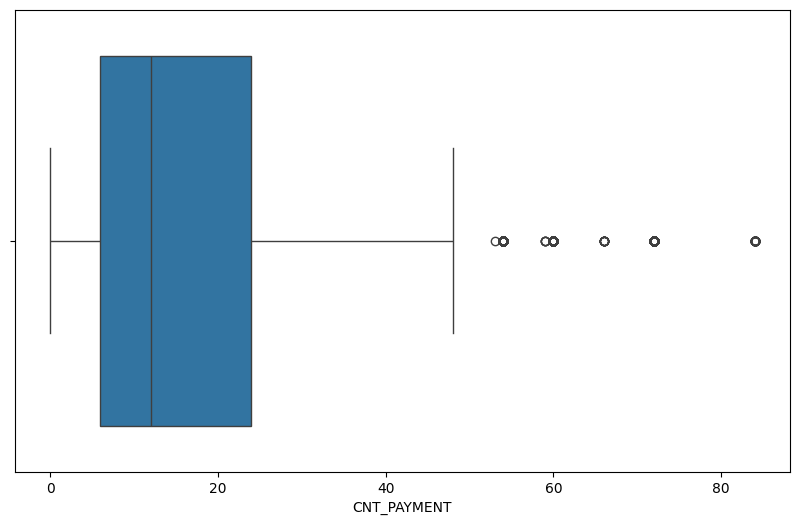

----------------------------------------------------------------


In [214]:
for col in num_cols:
    print("99th Percentile", np.percentile(papp_df[col],99))
    print(papp_df[col].describe())
    plt.figure(figsize=[10,6])
    sns.boxplot(data=papp_df, x=col)
    plt.show()
    print("----------------------------------------------------------------")


BIVARIATE AND MULTIVARIATE ANALYSIS

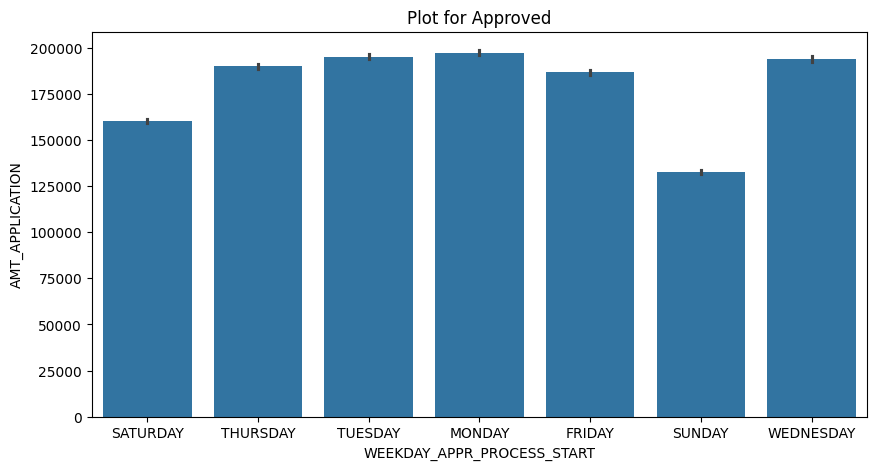

In [215]:
plt.figure(figsize=[10,5])
sns.barplot(x="WEEKDAY_APPR_PROCESS_START", y="AMT_APPLICATION", data=approved)
plt.title("Plot for Approved")
plt.show()

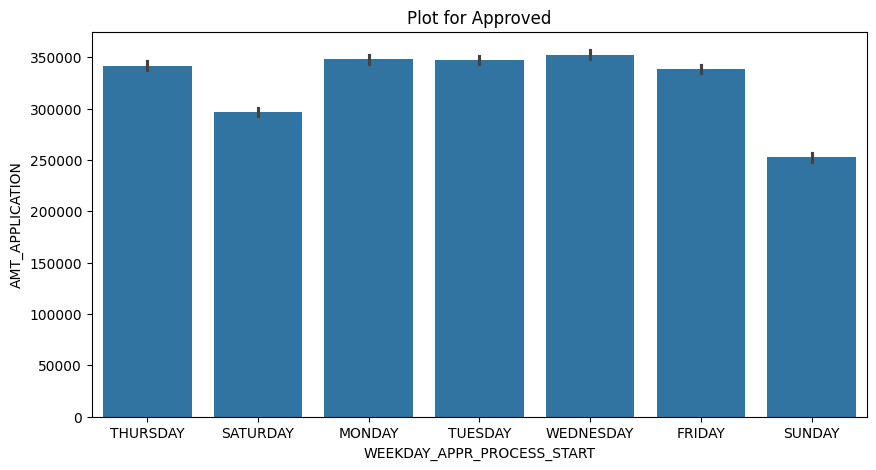

In [216]:
plt.figure(figsize=[10,5])
sns.barplot(x="WEEKDAY_APPR_PROCESS_START", y="AMT_APPLICATION", data=refused)
plt.title("Plot for Approved")
plt.show()

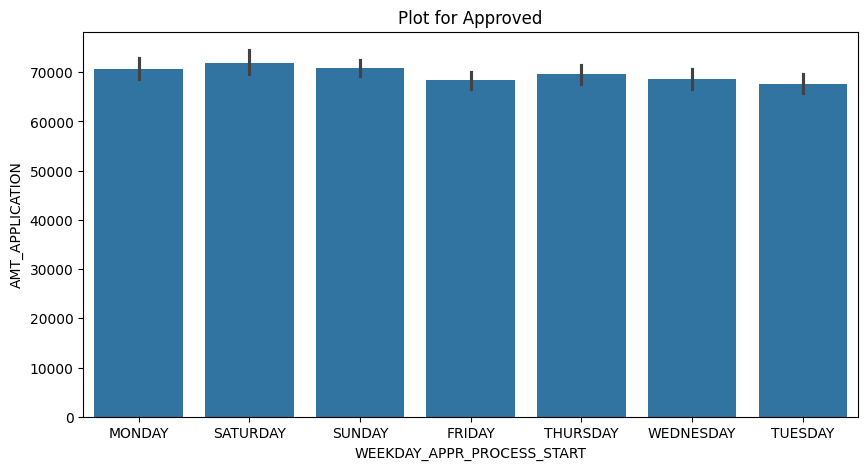

In [217]:
plt.figure(figsize=[10,5])
sns.barplot(x="WEEKDAY_APPR_PROCESS_START", y="AMT_APPLICATION", data=unused)
plt.title("Plot for Approved")
plt.show()

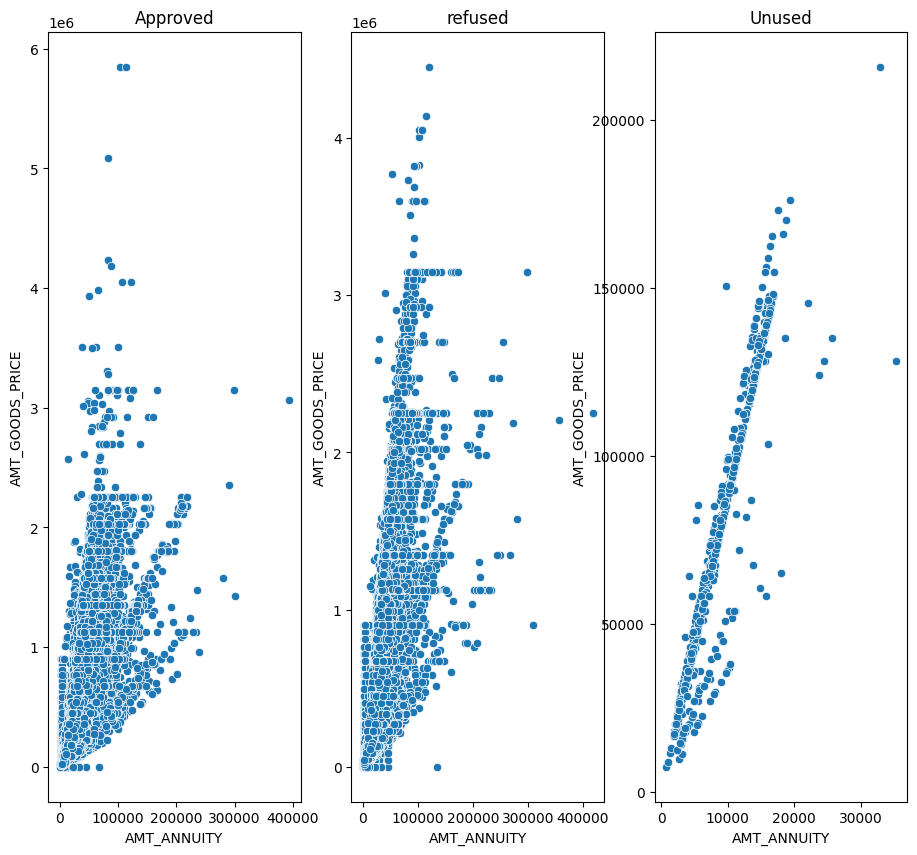

In [218]:
plt.figure(figsize=[15,10])
plt.subplot(1,4,1)
plt.title("Approved")
sns.scatterplot(x = "AMT_ANNUITY" , y = "AMT_GOODS_PRICE" , data = approved)
plt.subplot(1,4,2)
plt.title("refused")
sns.scatterplot(x = "AMT_ANNUITY" , y = "AMT_GOODS_PRICE" , data = refused)
plt.subplot(1,4,3)
plt.title("Unused")
sns.scatterplot(x = "AMT_ANNUITY" , y = "AMT_GOODS_PRICE" , data = unused)
plt.show()

In [219]:
corr_approved = approved[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE", "CNT_PAYMENT" ]]
corr_refused = refused[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE", "CNT_PAYMENT" ]]
corr_cancelled = cancelled[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE", "CNT_PAYMENT" ]]
corr_unused = unused[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE", "CNT_PAYMENT" ]]

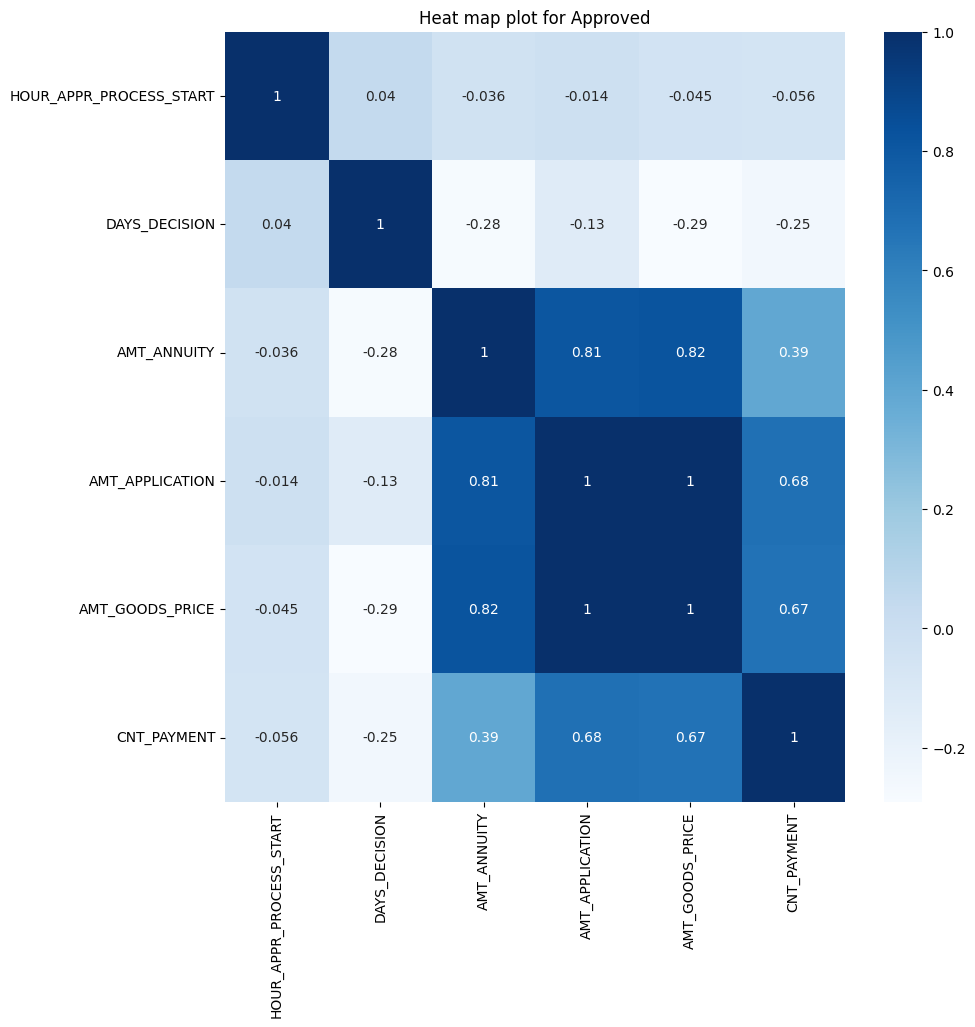

In [220]:
# #co-relation for numeric columns for approved
# plt.figure(figsize=[10,10])
# sns.heatmap(corr_approved.corr(),annot=True, cmap="Blues")
# plt.title("Heat map plot for Approved")
# plt.show()
# Convert numeric columns to numeric values, ignoring errors
for col in num_cols:
    papp_df[col] = pd.to_numeric(papp_df[col], errors='coerce')

# Calculate correlation matrix
corr_approved = papp_df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=[10,10])
sns.heatmap(corr_approved, annot=True, cmap="Blues")
plt.title("Heat map plot for Approved")
plt.show()


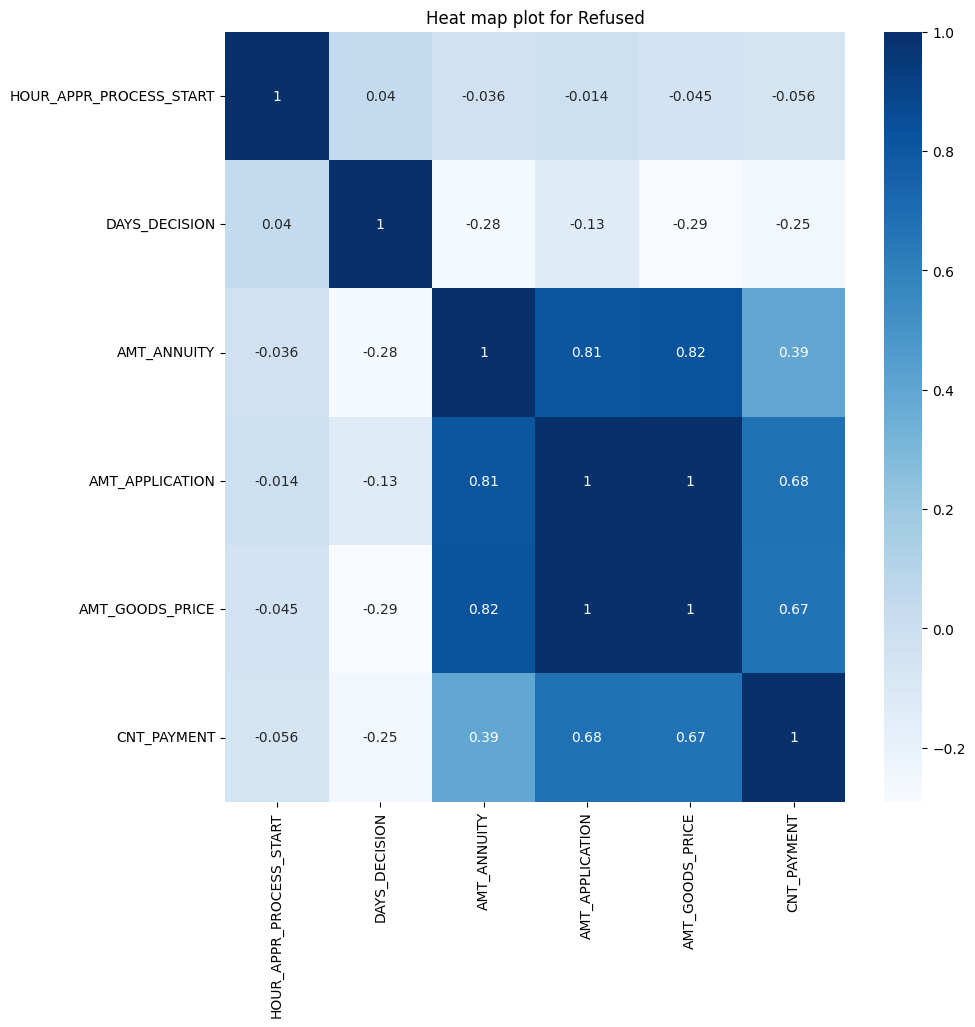

In [221]:
# #co-relation for numeric columns for Refused
# plt.figure(figsize=[10,10])
# sns.heatmap(corr_refused.corr(),annot=True, cmap="Blues")
# plt.title("Heat map plot for Refused")
# plt.show()
# Convert numeric columns to numeric values, ignoring errors
for col in num_cols:
    papp_df[col] = pd.to_numeric(papp_df[col], errors='coerce')

# Calculate correlation matrix
corr_refused = papp_df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=[10,10])
sns.heatmap(corr_refused, annot=True, cmap="Blues")
plt.title("Heat map plot for Refused")
plt.show()


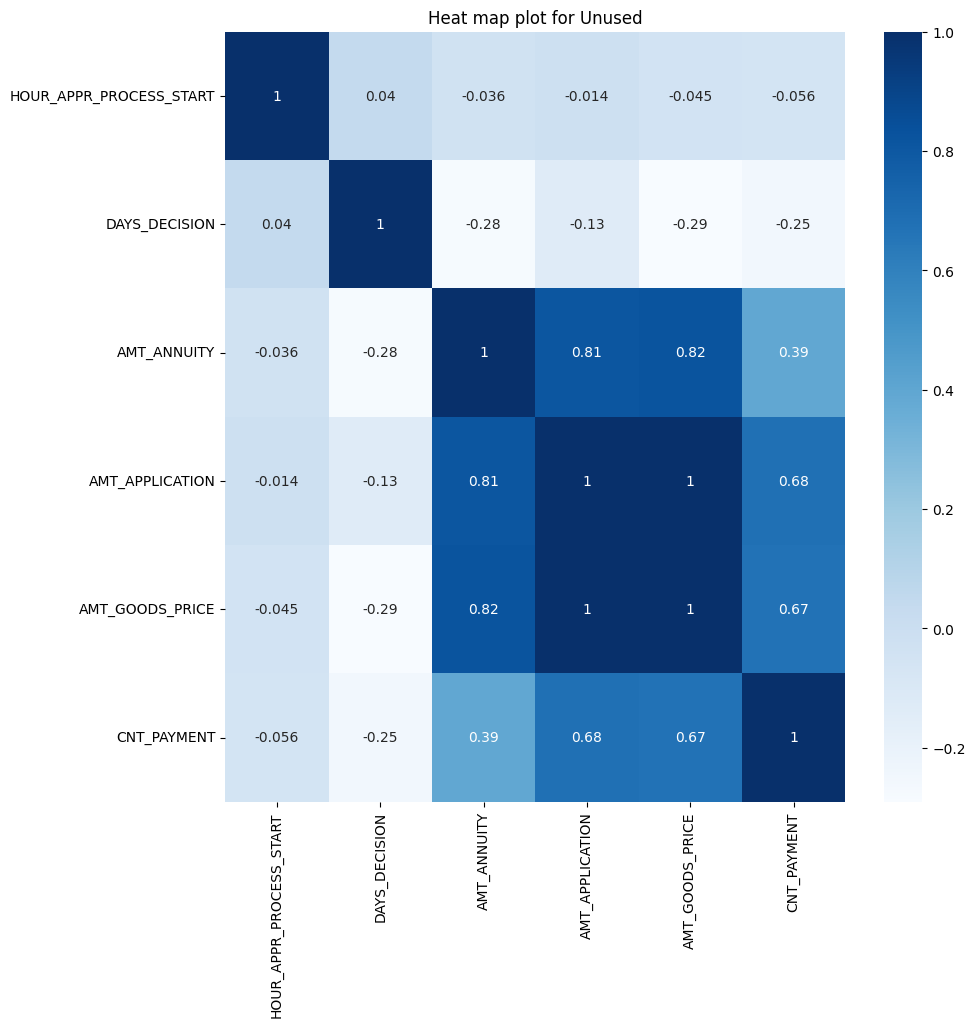

In [222]:
# #co-relation for numeric columns for unused
# plt.figure(figsize=[10,10])
# sns.heatmap(corr_unused.corr(),annot=True, cmap="Blues")
# plt.title("Heat map plot for Unused")
# plt.show()
# Convert numeric columns to numeric values, ignoring errors
for col in num_cols:
    papp_df[col] = pd.to_numeric(papp_df[col], errors='coerce')

# Calculate correlation matrix
corr_unused = papp_df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=[10,10])
sns.heatmap(corr_unused, annot=True, cmap="Blues")
plt.title("Heat map plot for Unused")
plt.show()


For above heatmap plot 
1. The AMT_ANNUITY is more correlated with AMT_APPLICATION and AMY_GOODS_PRICE while less correlated with CNT_PAYMENT
2. DAYS_DECISION is less correlated with all other parameters.
3. The same goes with HOUR_APPR_PROCESS_START 

In [223]:
# merge the application and previous application dataframes
merge_df = app_df.merge(papp_df, on = ["SK_ID_CURR"] , how= 'left')
merge_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE_Category
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,1,1,0,1,1,0,1.0,2,WEDNESDAY,10,0,0,-1134.0,0,1,1038818.0,Consumer loans,9251.775,179055.0,very_low credit,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0,Very High
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,0,1,1,0,2.0,1,MONDAY,11,0,0,-828.0,0,1,1810518.0,Cash loans,98356.995,900000.0,Very High,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0,NaN
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,0,1,1,0,2.0,1,MONDAY,11,0,0,-828.0,0,1,2636178.0,Consumer loans,64567.665,337500.0,low Credit,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0,NaN
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,0,1,1,0,2.0,1,MONDAY,11,0,0,-828.0,0,1,2396755.0,Consumer loans,6737.310,68809.5,very_low credit,68809.5,SATURDAY,15.0,Y,1.0,XAP,Approved,2341.0,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.0,low
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,1,1,1,1,1,0,1.0,2,MONDAY,9,0,0,-815.0,0,0,1564014.0,Consumer loans,5357.250,24282.0,very_low credit,24282.0,FRIDAY,5.0,Y,1.0,XAP,Approved,815.0,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,365243.0,784.0,694.0,724.0,714.0,0.0,very_low


In [224]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925924 entries, 0 to 925923
Data columns (total 67 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    925924 non-null  int64   
 1   TARGET                        925924 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          925924 non-null  object  
 3   CODE_GENDER                   925924 non-null  object  
 4   FLAG_OWN_CAR                  925924 non-null  object  
 5   FLAG_OWN_REALTY               925924 non-null  object  
 6   CNT_CHILDREN                  925924 non-null  int64   
 7   AMT_INCOME_TOTAL              925924 non-null  float64 
 8   AMT_CREDIT_x                  925924 non-null  float64 
 9   AMT_ANNUITY_x                 925857 non-null  float64 
 10  AMT_GOODS_PRICE_x             925204 non-null  float64 
 11  NAME_TYPE_SUITE               923484 non-null  object  
 12  NAME_INCOME_TYPE              

NOW WORKING ON THE MERGED DATASET.

In [225]:
# # filtering required columns for our Analysis
for col in merge_df.columns:
    if col.startswith("FLAG"):
        merge_df.drop(columns=col , axis= 1, inplace=True)

In [226]:
merge_df.shape

(925924, 56)

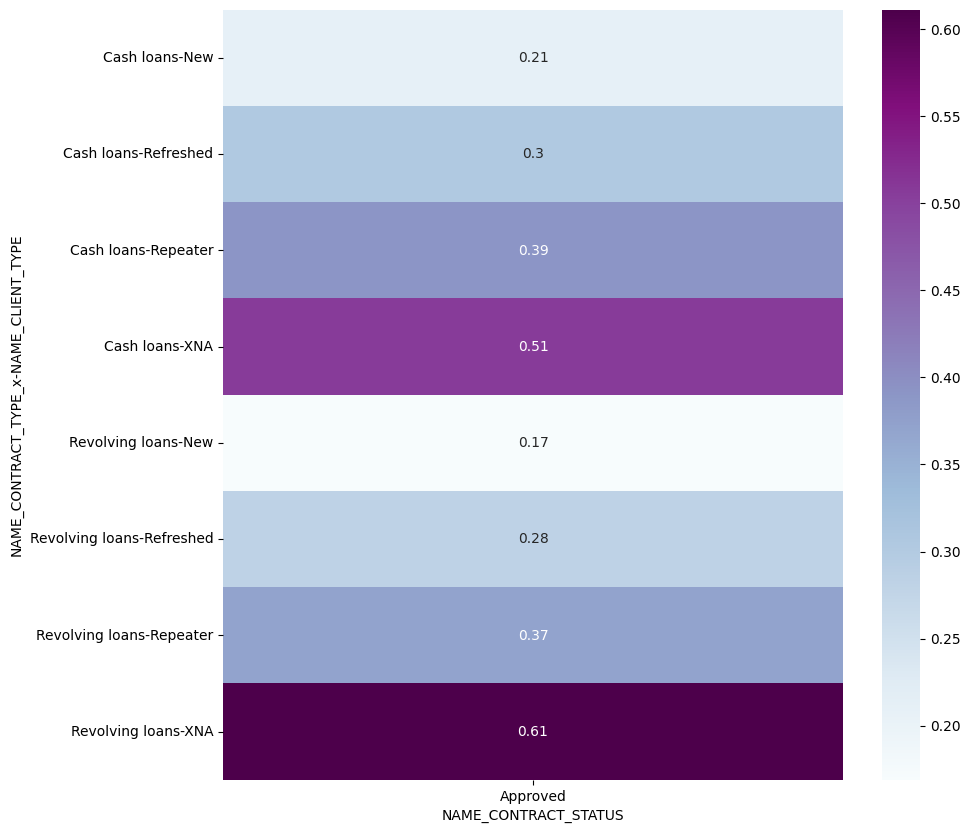

In [230]:
res1 = pd.pivot_table(data=merge_df , index= ["NAME_CONTRACT_TYPE_x" , "NAME_CLIENT_TYPE"] , columns=["NAME_CONTRACT_STATUS"] , values="NFLAG_INSURED_ON_APPROVAL" , aggfunc="mean")
plt.figure(figsize=[10,10])
sns.heatmap(res1 , annot=True , cmap='BuPu')
plt.show()

-> Conclusion

Overall, the heatmap provides a visual representation of the average NFLAG_INSURED_ON_APPROVAL values across different contract types, client types, and contract statuses. It shows in which type of contract the approval is more
1. For Loans-XNA the approval Rate is high.
2. For new loans the approval Rate is low.
3. Cash loans have average approval rate.

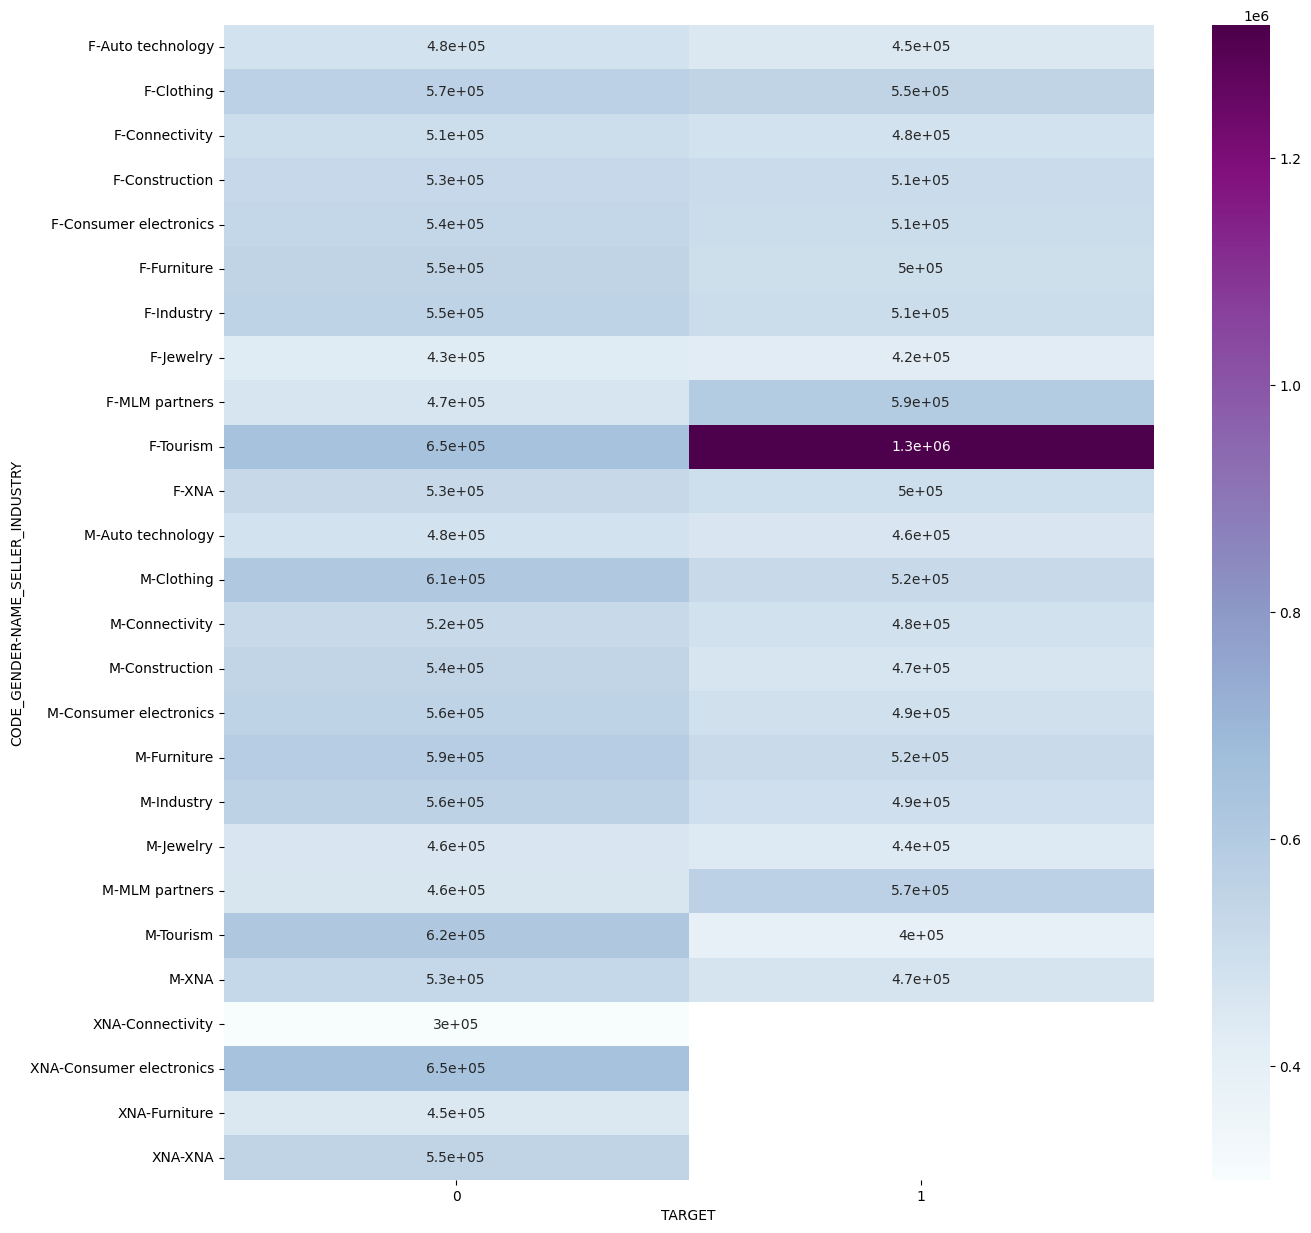

In [231]:
res2 = pd.pivot_table(data=merge_df , index = ["CODE_GENDER" , "NAME_SELLER_INDUSTRY"] , columns= ["TARGET"] , values= "AMT_GOODS_PRICE_x" , aggfunc="mean")
plt.figure(figsize=[15,15])
sns.heatmap(res2 , annot=True , cmap='BuPu')
plt.show()

Conclusion

We get to know how the Goods Price is related with the people on the basis of Code Gender and Name Seller Industry

1. It show Average AMT_GOODS_PRICE will be more for Tourism
2. It shows average AMT_GOODS_PRICE will be less for XNA Connectivity